# Mengidentifikasi Faktor-Faktor Utama yang Mempenaruhi Keputusan Karyawan untuk Bertahan atau Meninggalkan Perusahaan

**Beginner Banget Notebook Submissions**

Kaggle Score: 0.71542

## Team Members:
- Deira Aisya Refani
- Gracella Wiendy Koesnadi
- Melinda Annastasia Budijono

## Problem:
Dalam lingkungan kerja yang semakin kompetitif, perusahaan dihadapkan pada tantangan untuk memahami dan memprediksi perilaku karyawan, terutama terkait dengan attrisi.

## Objective:
Dapat memberikan wawasan yang dapat membantu perusahaan mengurangi tingkat attrisi, meningkatkan retensi karyawan, dan menciptakan lingkungan kerja yang lebih produktif.

## Notes:
Ada beberapa langkah di **EDA** yang baru bisa kami lakukan setelah tahap **data preprocessing**, jadi **insight-insight** tersebut baru bisa didapatkan setelah tahap **data preprocessing**.

## Pembeda dengan Notebook yang lain:
Di bagian Data Processing feature engineering di notebook ini bernama **5_high_cols**.

## **Importing Libraries and Data**

In [ ]:
# Install External Sources
!pip install catboost lightgbm
!pip install plotly

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [ ]:
# Import Data Train and Test
train = pd.read_csv('/kaggle/input/data-royale-2024/Train.csv')
test = pd.read_csv('/kaggle/input/data-royale-2024/Test.csv')

## **Exploratory Data Analysis (EDA)**

### Mengecek Ukuran dari Dataframe train dan test

In [ ]:
# Mengecek Ukuran dari Dataframe train dan test
print(train.shape)
print(test.shape)

(6530, 35)
(7000, 34)


Di dataframe test tidak ada kolom Attrition sehingga hanya berjumlah 34.

### Melihat Isi dari Dataframe train dan test

In [ ]:
# Melihat Isi dari Dataframe train
train.head()

id   Age     BusinessTravel  DailyRate              Department  \
0  7000  44.0                NaN        NaN         Human Resources   
1  7001  28.0      Travel_Rarely      949.0         Human Resources   
2  7002  26.0      Travel_Rarely      566.0         Human Resources   
3  7003  34.0  Travel_Frequently      512.0                   Sales   
4  7004  34.0      Travel_Rarely      475.0  Research & Development   

   DistanceFromHome  Education    EducationField  EmployeeCount  \
0               NaN        NaN         Marketing            NaN   
1               7.0        4.0  Technical Degree            1.0   
2              10.0        3.0           Medical            1.0   
3               3.0        3.0           Medical            1.0   
4              12.0        1.0           Medical            1.0   

   EnvironmentSatisfaction  ... StandardHours  StockOptionLevel  \
0                      NaN  ...           NaN               NaN   
1                      3.0  ...          80.0               1.0   
2                      3.0  ...          80.0               0.0   
3                      1.0  ...          80.0               1.0   
4                      2.0  ...          80.0               0.0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 17                      3             NaN               7   
1                  6                      3             3.0               5   
2                  5                      4             3.0               5   
3                 14                      2             3.0              12   
4                  5                      4             3.0               3   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  
0                  5                        5                     2          0  
1                  2                        0                     3          1  
2                  3                        1                     2          0  
3                  8                        1                    11          0  
4                  2                        0                     2          0  

[5 rows x 35 columns]

In [ ]:
# Melihat Isi dari Dataframe test
test.head()

id   Age     BusinessTravel  DailyRate              Department  \
0   0  41.0      Travel_Rarely      467.0  Research & Development   
1   1  25.0      Travel_Rarely      844.0         Human Resources   
2   2  30.0  Travel_Frequently      365.0                   Sales   
3   3  34.0      Travel_Rarely      281.0  Research & Development   
4   4  33.0      Travel_Rarely      779.0  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0               NaN        4.0  Life Sciences            NaN   
1              13.0        2.0  Life Sciences            1.0   
2               5.0        3.0  Life Sciences            1.0   
3              29.0        3.0  Life Sciences            1.0   
4               5.0        4.0  Life Sciences            1.0   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                      3.0  ...                      2.0           80.0   
1                      3.0  ...                      4.0           80.0   
2                      3.0  ...                      4.0           80.0   
3                      2.0  ...                      1.0           80.0   
4                      3.0  ...                      3.0           80.0   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0               2.0                  6                     2              NaN   
1               0.0                  0                     6              3.0   
2               0.0                  5                     4              3.0   
3               2.0                 10                     1              3.0   
4               1.0                  2                     2              2.0   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              5                   3                        0   
1              0                   0                        0   
2              4                   2                        1   
3              8                   7                        7   
4              2                   2                        0   

   YearsWithCurrManager  
0                     4  
1                     0  
2                     3  
3                     7  
4                     2  

[5 rows x 34 columns]

### Melihat Tipe-Tipe Data yang Ada di Dataframe train dan test

In [ ]:
# Melihat Tipe-Tipe Data yang Ada di Dataframe train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6530 entries, 0 to 6529
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        6530 non-null   int64  
 1   Age                       6530 non-null   float64
 2   BusinessTravel            5236 non-null   object 
 3   DailyRate                 5216 non-null   float64
 4   Department                6530 non-null   object 
 5   DistanceFromHome          5207 non-null   float64
 6   Education                 5212 non-null   float64
 7   EducationField            6530 non-null   object 
 8   EmployeeCount             5221 non-null   float64
 9   EnvironmentSatisfaction   5230 non-null   float64
 10  Gender                    6530 non-null   object 
 11  HourlyRate                5201 non-null   float64
 12  JobInvolvement            5225 non-null   float64
 13  JobLevel                  5240 non-null   float64
 14  JobRole 

In [ ]:
# Melihat Tipe-Tipe Data yang Ada di Dataframe test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        7000 non-null   int64  
 1   Age                       7000 non-null   float64
 2   BusinessTravel            5845 non-null   object 
 3   DailyRate                 5860 non-null   float64
 4   Department                7000 non-null   object 
 5   DistanceFromHome          5886 non-null   float64
 6   Education                 5845 non-null   float64
 7   EducationField            7000 non-null   object 
 8   EmployeeCount             5862 non-null   float64
 9   EnvironmentSatisfaction   5906 non-null   float64
 10  Gender                    7000 non-null   object 
 11  HourlyRate                5862 non-null   float64
 12  JobInvolvement            5848 non-null   float64
 13  JobLevel                  5870 non-null   float64
 14  JobRole 

Tipe-tipe data yang ada di dalam dataframe terdapat tipe data numerikal **(int64 dan float64)** dan **kategorikal (object)**.

### Melihat Hasil Statistik dari Dataframe train dan test

In [ ]:
# Melihat Hasil Statistik dari Dataframe train
train.describe()

id          Age    DailyRate  DistanceFromHome    Education  \
count   6530.000000  6530.000000  5216.000000       5207.000000  5212.000000   
mean   10264.500000    42.529301   793.837423          9.655848     2.864351   
std     1885.192961    17.545233   358.183860          7.392166     0.954451   
min     7000.000000    18.000000   107.000000          1.000000     1.000000   
25%     8632.250000    31.000000   505.000000          4.000000     2.000000   
50%    10264.500000    36.000000   792.000000          8.000000     3.000000   
75%    11896.750000    47.000000  1093.000000         14.000000     4.000000   
max    13529.000000    86.717501  1495.000000         29.000000     5.000000   

       EmployeeCount  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count         5221.0              5230.000000  5201.000000     5225.000000   
mean             1.0                 2.646845    65.654297        2.637321   
std              0.0                 1.036965    17.839716        0.717016   
min              1.0                 1.000000    30.000000        1.000000   
25%              1.0                 2.000000    51.000000        2.000000   
50%              1.0                 3.000000    65.000000        3.000000   
75%              1.0                 3.000000    81.000000        3.000000   
max              1.0                 4.000000   100.000000        4.000000   

          JobLevel  ...  StandardHours  StockOptionLevel  TotalWorkingYears  \
count  5240.000000  ...         5239.0       5236.000000        6530.000000   
mean      1.864313  ...           80.0          0.737013          11.602757   
std       0.984566  ...            0.0          0.795506           8.599169   
min       1.000000  ...           80.0          0.000000           0.000000   
25%       1.000000  ...           80.0          0.000000           6.000000   
50%       2.000000  ...           80.0          1.000000           9.000000   
75%       2.000000  ...           80.0          1.000000          15.000000   
max       5.000000  ...           80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            6530.000000      5197.000000     6530.000000   
mean                2.724655         2.682894        8.338132   
std                 1.233432         0.727949        8.252890   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000       10.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
count         6530.000000              6530.000000           6530.000000   
mean             4.566156                 2.821746              4.374732   
std              3.925480                 3.658925              3.812741   
min              0.000000                 0.000000              0.000000   
25%              2.000000                 0.000000              2.000000   
50%              3.000000                 1.000000              3.000000   
75%              7.000000                 4.000000              7.000000   
max             18.000000                15.000000             16.000000   

         Attrition  
count  6530.000000  
mean      0.396325  
std       0.489171  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  

[8 rows x 27 columns]

In [ ]:
# Melihat Hasil Statistik dari Dataframe test
test.describe()

id          Age    DailyRate  DistanceFromHome    Education  \
count  7000.000000  7000.000000  5860.000000       5886.000000  5845.000000   
mean   3499.500000    37.163571   801.695222          8.334523     2.889820   
std    2020.870275     7.901466   350.596530          6.736657     0.950615   
min       0.000000    18.000000   111.000000          1.000000     1.000000   
25%    1749.750000    32.000000   523.000000          3.000000     2.000000   
50%    3499.500000    36.000000   799.000000          6.000000     3.000000   
75%    5249.250000    42.000000  1093.000000         11.000000     4.000000   
max    6999.000000    60.000000  1497.000000         29.000000     5.000000   

       EmployeeCount  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count         5862.0              5906.000000  5862.000000     5848.000000   
mean             1.0                 2.802066    65.828557        2.780267   
std              0.0                 0.990866    17.697629        0.635940   
min              1.0                 1.000000    30.000000        1.000000   
25%              1.0                 2.000000    51.000000        2.000000   
50%              1.0                 3.000000    66.000000        3.000000   
75%              1.0                 4.000000    80.000000        3.000000   
max              1.0                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  5870.000000  ...               5858.000000         5859.0   
mean      1.952470  ...                  2.715603           80.0   
std       0.976093  ...                  1.000614            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       2.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       5864.000000        7000.000000            7000.000000   
mean           0.850443          11.447714               2.803143   
std            0.802503           7.257760               1.115730   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          38.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      5910.000000     7000.000000         7000.000000   
mean          2.801692        7.118143            4.363143   
std           0.620295        5.560758            3.311751   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       37.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              7000.000000           7000.000000  
mean                  2.088000              4.245714  
std                   2.898724              3.297277  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

### Mengecek NaN Values dari Dataframe train dan test

In [ ]:
# Mengecek NaN Values dari Dataframe train
train.isnull().sum()

id                             0
Age                            0
BusinessTravel              1294
DailyRate                   1314
Department                     0
DistanceFromHome            1323
Education                   1318
EducationField                 0
EmployeeCount               1309
EnvironmentSatisfaction     1300
Gender                         0
HourlyRate                  1329
JobInvolvement              1305
JobLevel                    1290
JobRole                        0
JobSatisfaction             1344
MaritalStatus                  0
MonthlyIncome               1322
MonthlyRate                 1336
NumCompaniesWorked          1309
Over18                         0
OverTime                       0
PercentSalaryHike           1314
PerformanceRating           1338
RelationshipSatisfaction    1348
StandardHours               1291
StockOptionLevel            1294
TotalWorkingYears              0
TrainingTimesLastYear          0
WorkLifeBalance             1333
YearsAtCom

In [ ]:
# Mengecek NaN Values dari Dataframe test
train.isnull().sum()

id                             0
Age                            0
BusinessTravel              1294
DailyRate                   1314
Department                     0
DistanceFromHome            1323
Education                   1318
EducationField                 0
EmployeeCount               1309
EnvironmentSatisfaction     1300
Gender                         0
HourlyRate                  1329
JobInvolvement              1305
JobLevel                    1290
JobRole                        0
JobSatisfaction             1344
MaritalStatus                  0
MonthlyIncome               1322
MonthlyRate                 1336
NumCompaniesWorked          1309
Over18                         0
OverTime                       0
PercentSalaryHike           1314
PerformanceRating           1338
RelationshipSatisfaction    1348
StandardHours               1291
StockOptionLevel            1294
TotalWorkingYears              0
TrainingTimesLastYear          0
WorkLifeBalance             1333
YearsAtCom

Bisa kita lihat dari dataframe kita bahwa kolom-kolom yang masih memiliki NaN values adalah **BusinessTravel**, **DailyRate**, **DistanceFromHome**, **Education**, **EmployeeCount**, **EnvironmentSatisfaction**, **HourlyRate**, **JobInvolvement**, **JobLevel**, **JobSatisfaction**, **MonthlyIncome**, **MonthlyRate**, **NumCompaniesWorked**, **PercentSalaryHike**, **PerformanceRating**, **RelationshipSatisfaction**, **StandardHours**, **StockOptionLevel**, dan **WorkLifeBalance**. Kolom-kolom yang masih berisi NaN values ini akan kita olah di tahap **data preprocessing**.

### Mengecek Data yang Terduplikasi pada Dataframe train dan test

In [ ]:
# Mengecek Data yang Terduplikasi pada Dataframe train
train.duplicated().sum()

0

In [ ]:
# Mengecek Data yang Terduplikasi pada Dataframe test
test.duplicated().sum()

0

**Tidak ada data yang terduplikasi** di dalam dataframe kita.

### Mengihitung Jumlah Value Unik dari Setiap Kolom dari Dataframe train dan test

In [ ]:
# Mengihitung Jumlah Value Unik dari Setiap Kolom dari Dataframe train
train.nunique()

id                          6530
Age                         1043
BusinessTravel                 3
DailyRate                   1329
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               3910
MonthlyRate                 4667
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             41
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [ ]:
# Mengihitung Jumlah Value Unik dari Setiap Kolom dari Dataframe train
test.nunique()

id                          7000
Age                           43
BusinessTravel                 3
DailyRate                   1329
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               4265
MonthlyRate                 5158
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             39
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

Bisa kita lihat bahwa kolom **EmployeeCount**, **Over18**, dan **StandardHours** hanya mempunyai 1 value unik. Jika sebuah kolom hanya memiliki 1 nilai unik (misalnya, semua isinya adalah nilai yang sama), maka kolom tersebut tidak memberikan informasi yang berguna bagi model. Hal ini bisa diatasi dengan membuang kolom-kolom tersebut di tahap **data preprocessing**.

### Distribusi Employee Attrition

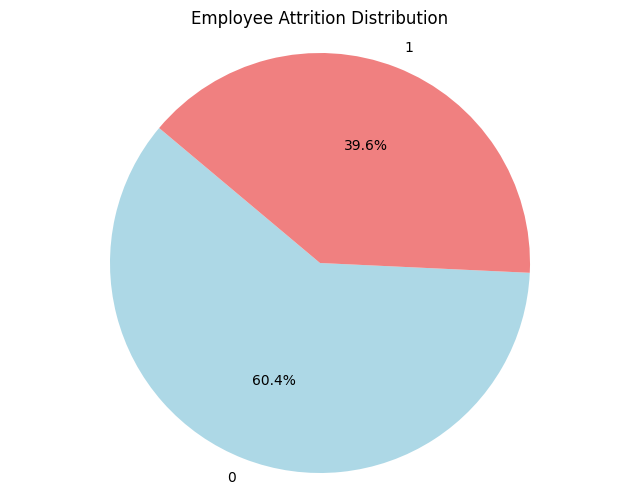

In [ ]:
attrition_counts = train['Attrition'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Employee Attrition Distribution')
plt.axis('equal')
plt.show()

Diagram pie yang dihasilkan menunjukkan bahwa tingkat attrisi di perusahaan cukup signifikan, dengan 39.6% karyawan mengalami attrisi, menunjukkan bahwa hampir 40% dari total karyawan keluar dari perusahaan. Walaupun sebagian besar karyawan masih tetap bertahan 60.4%, tingginya angka attrisi mengindikasikan perlunya perusahaan untuk memperhatikan faktor-faktor yang dapat meningkatkan retensi karyawan.

### Analisis Univariat untuk Kolom Numerikal

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



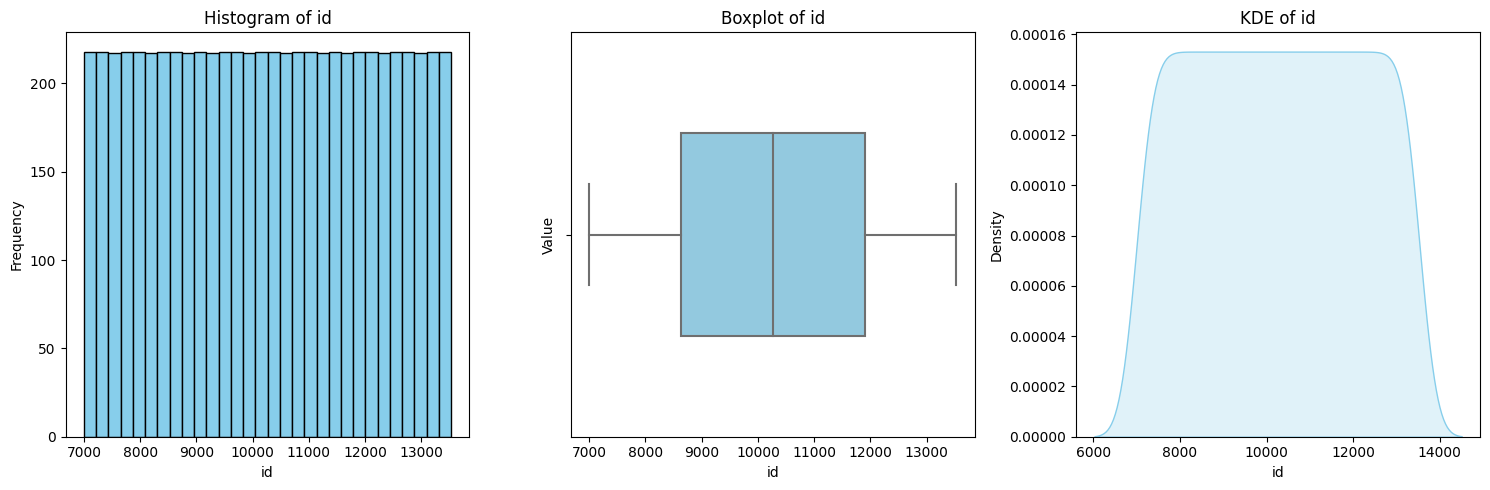

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



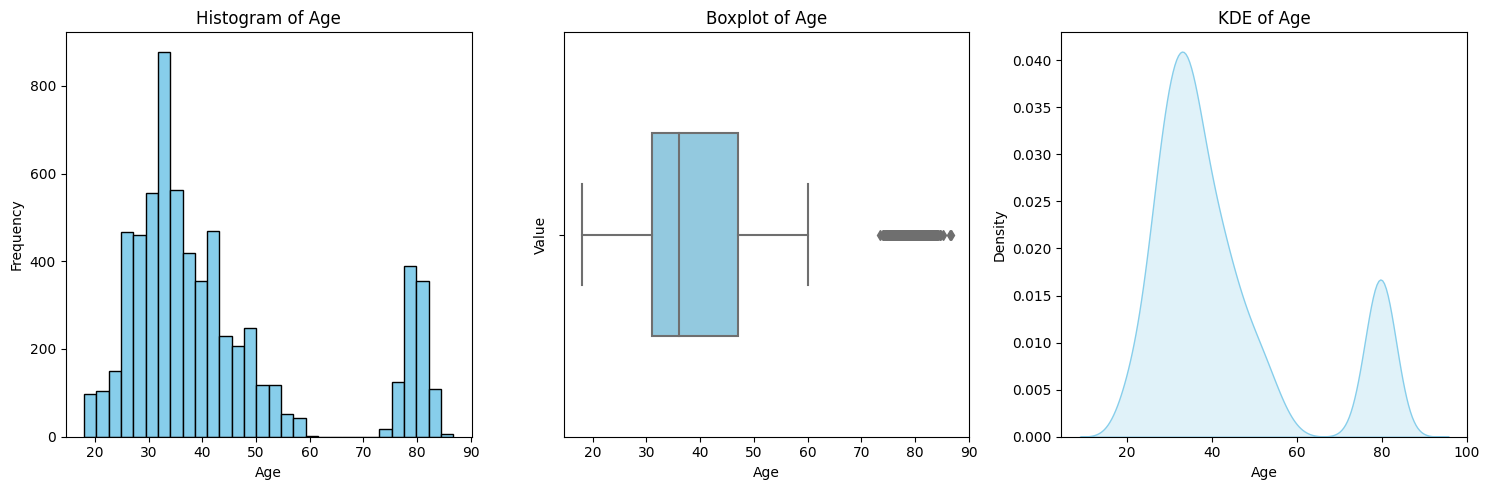

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



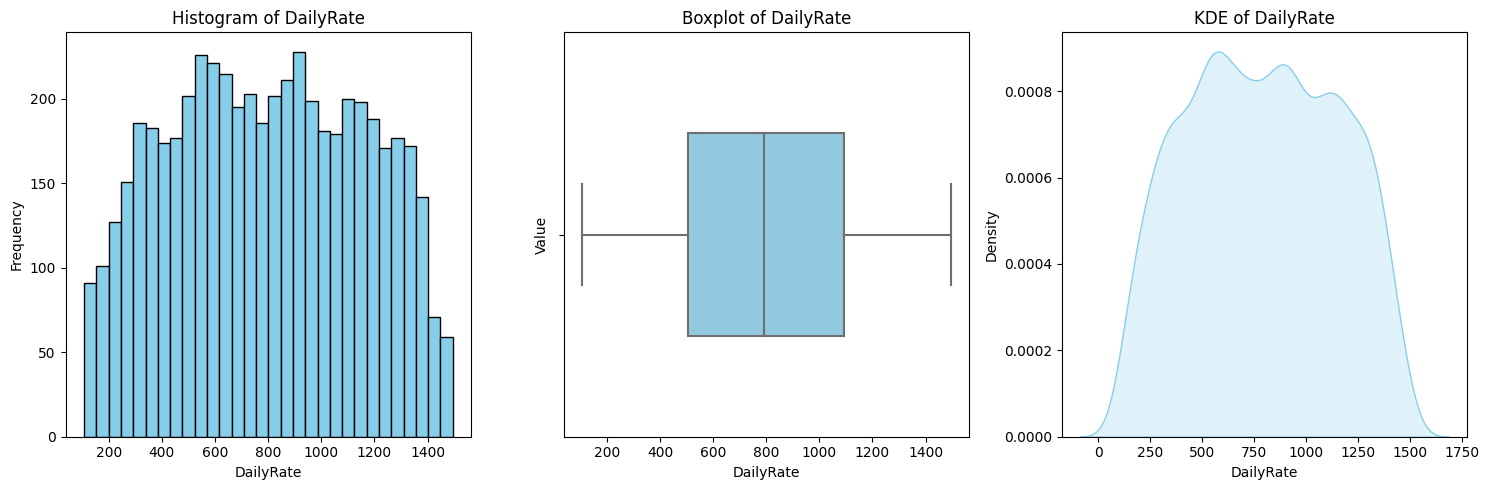

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



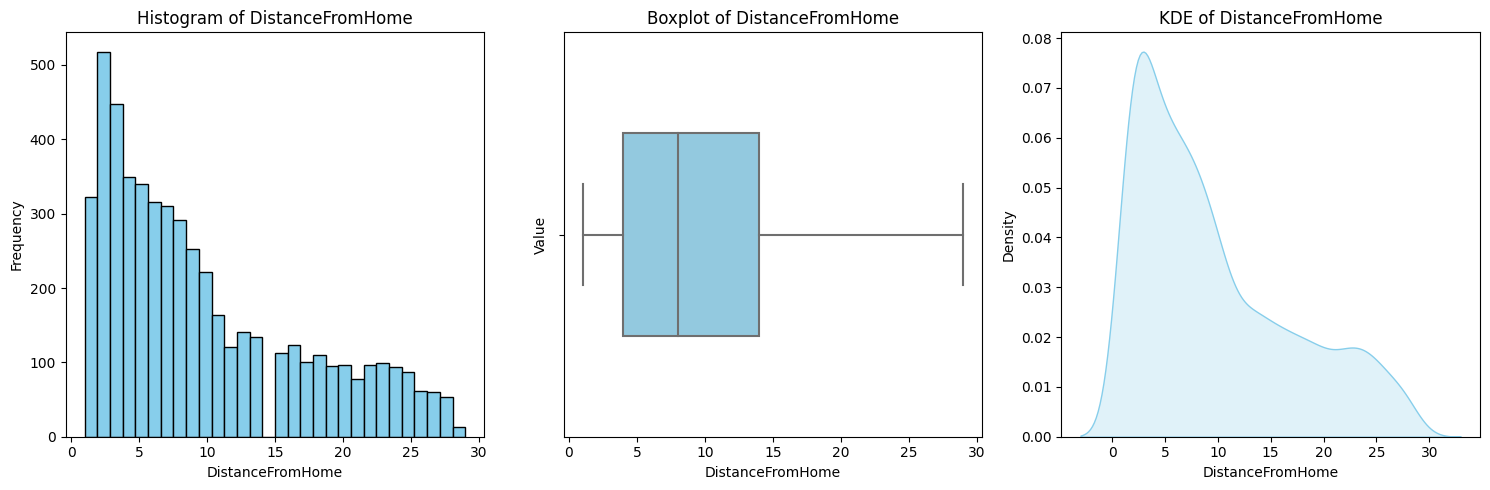

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



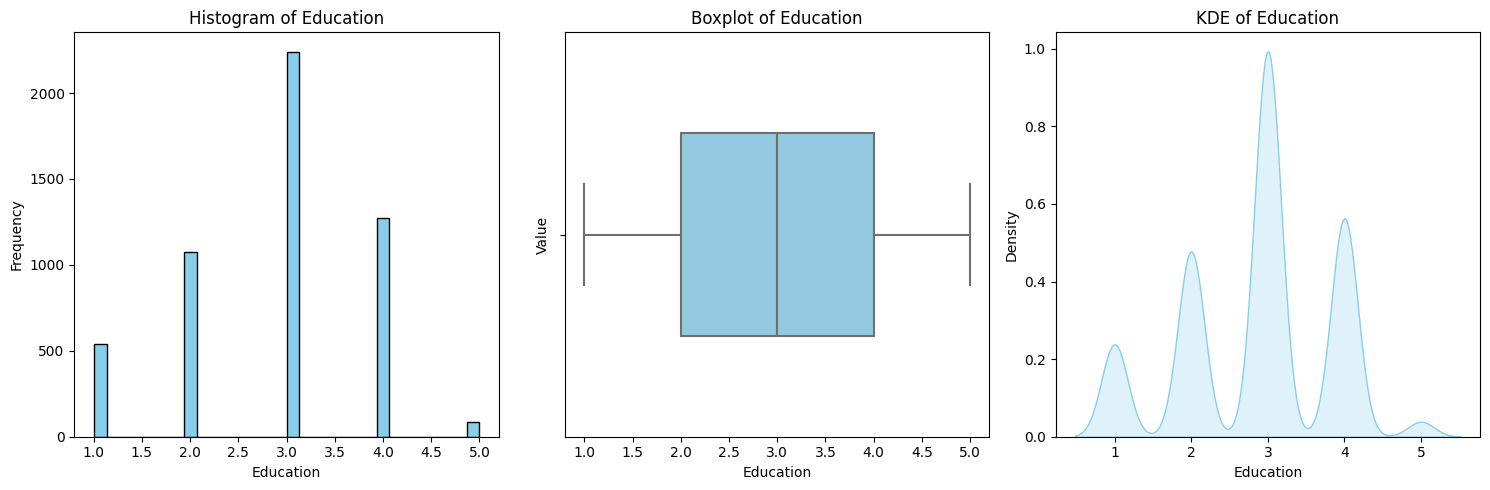

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/tmp/ipykernel_30/2384180935.py:22: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



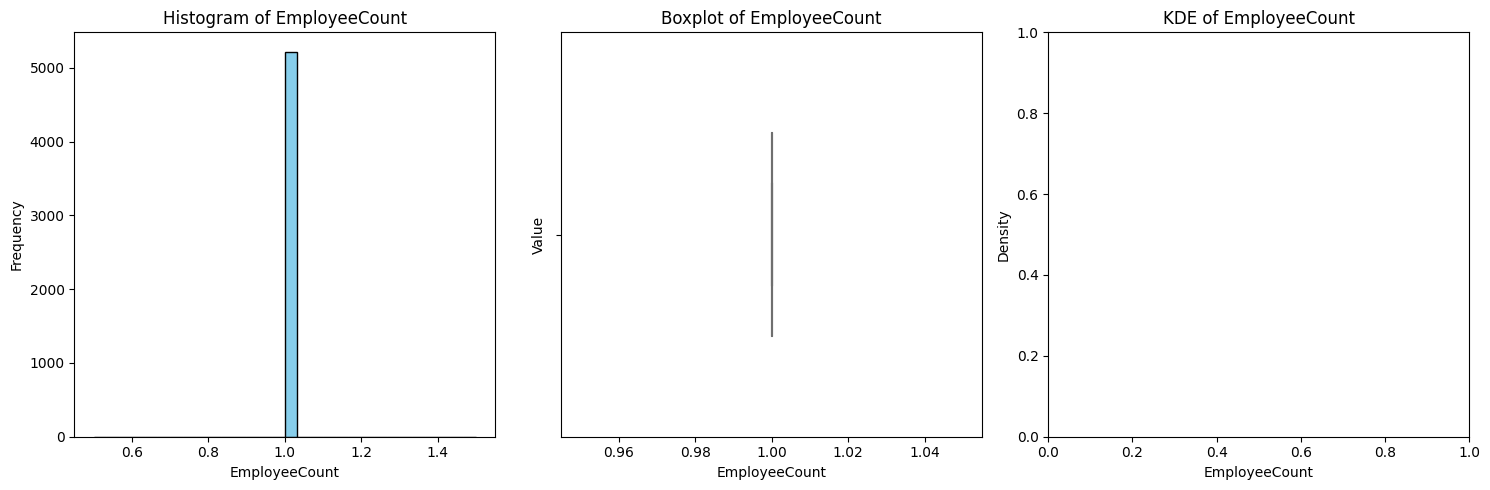

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



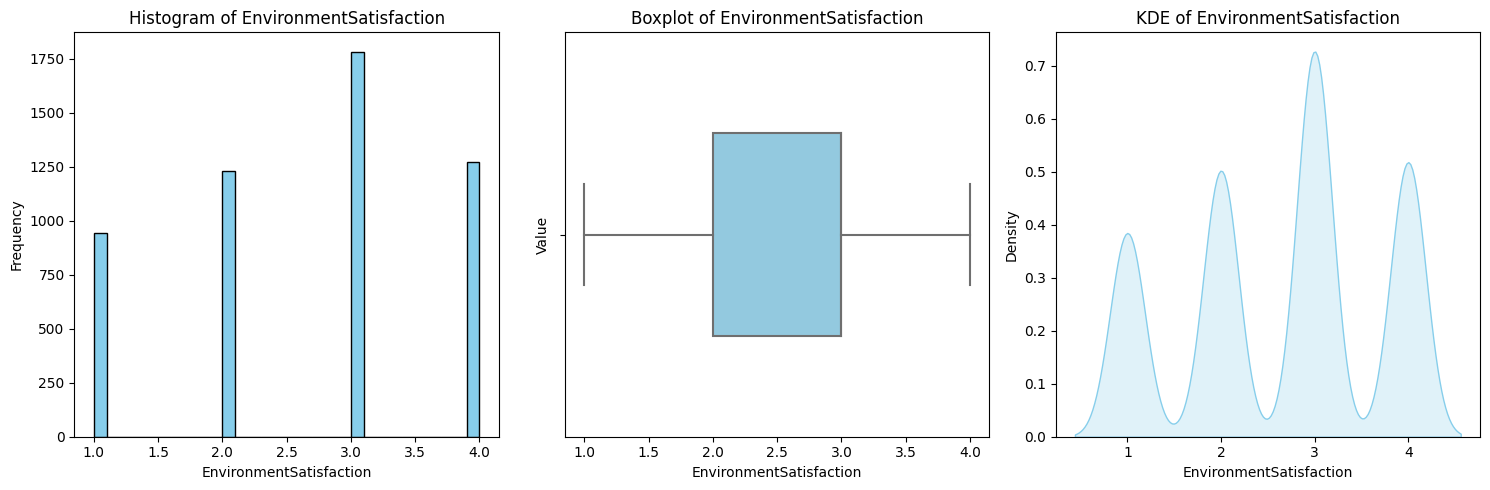

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



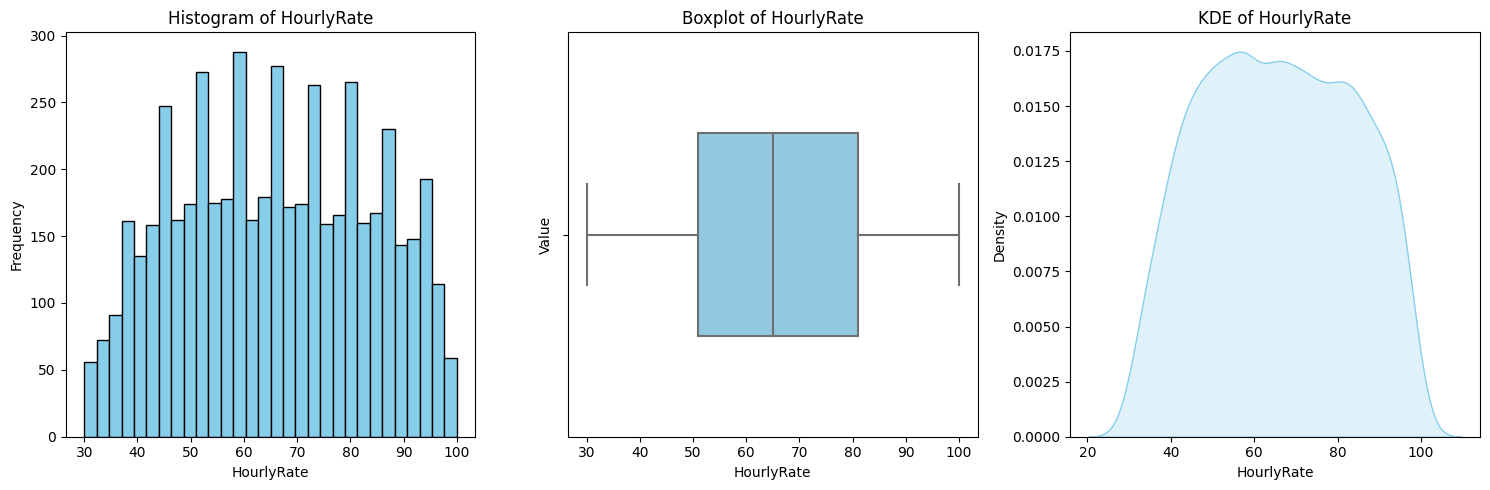

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



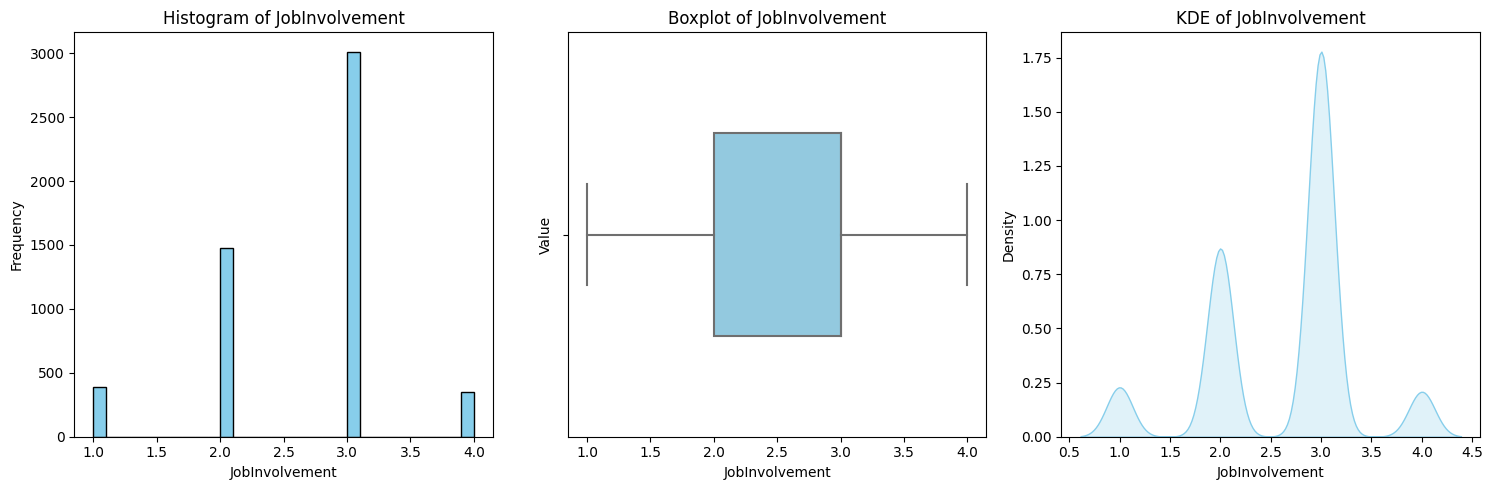

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



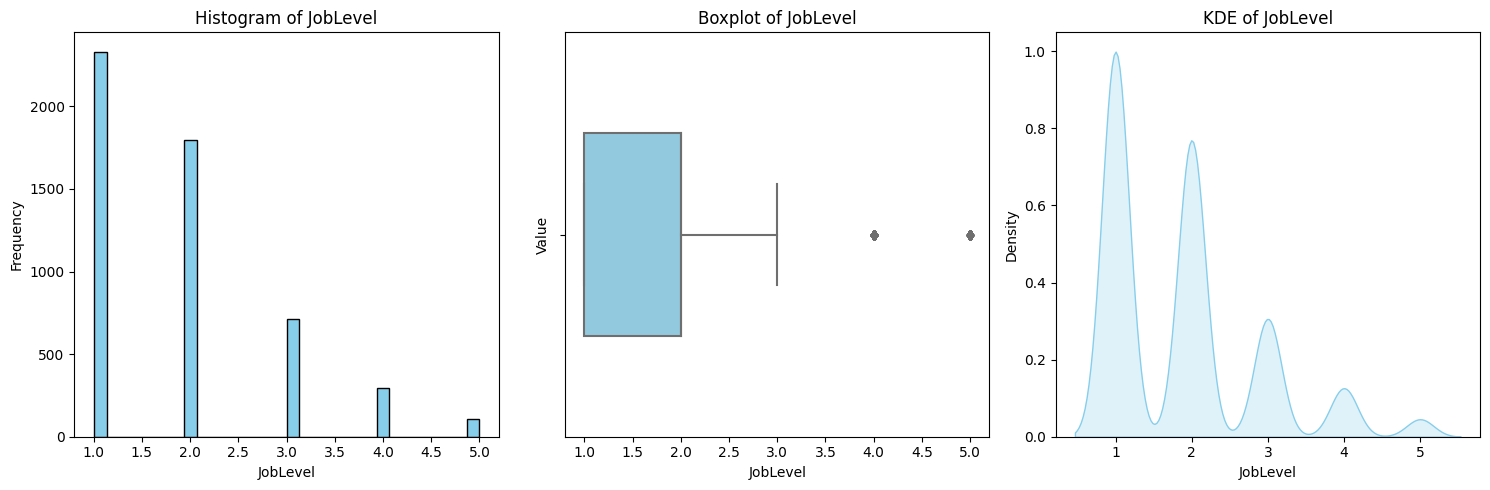

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



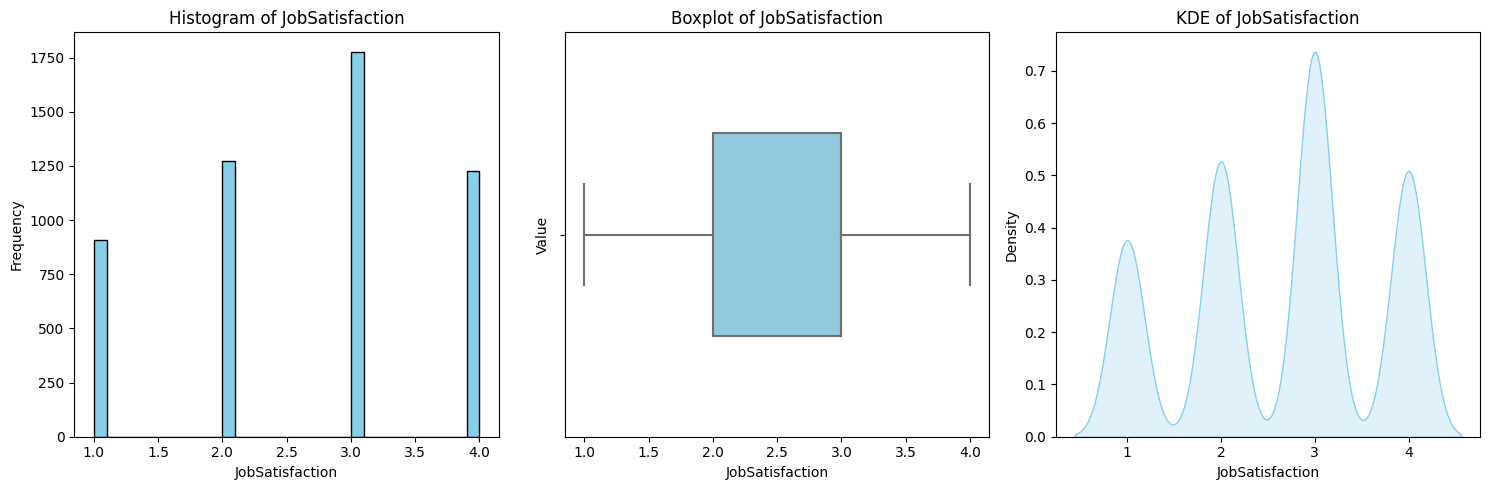

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



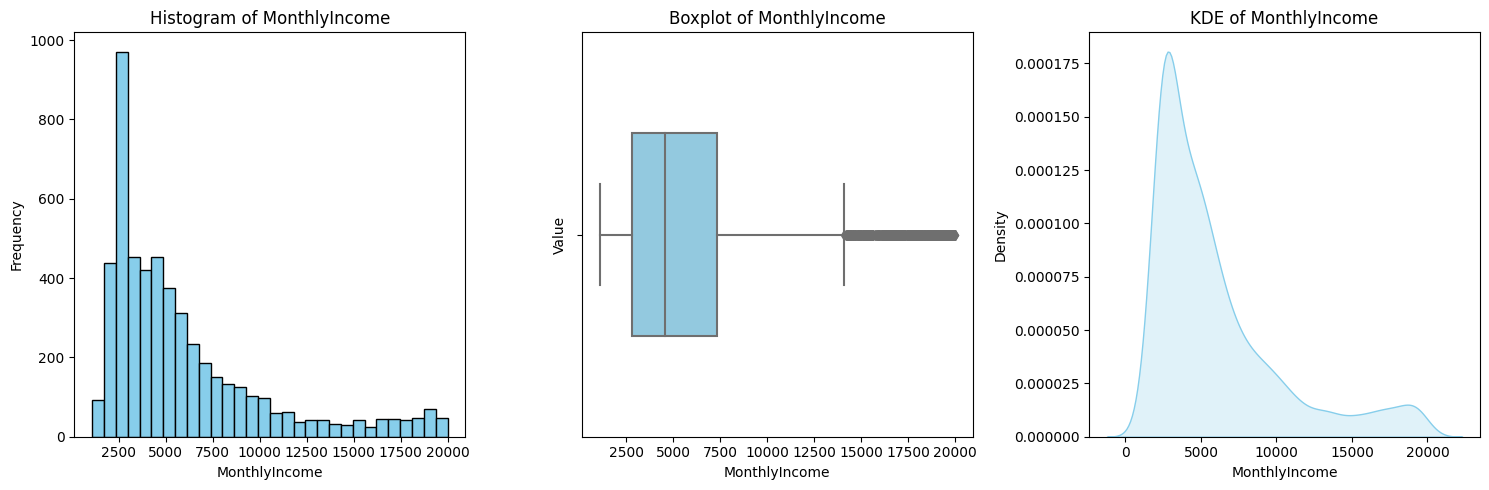

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



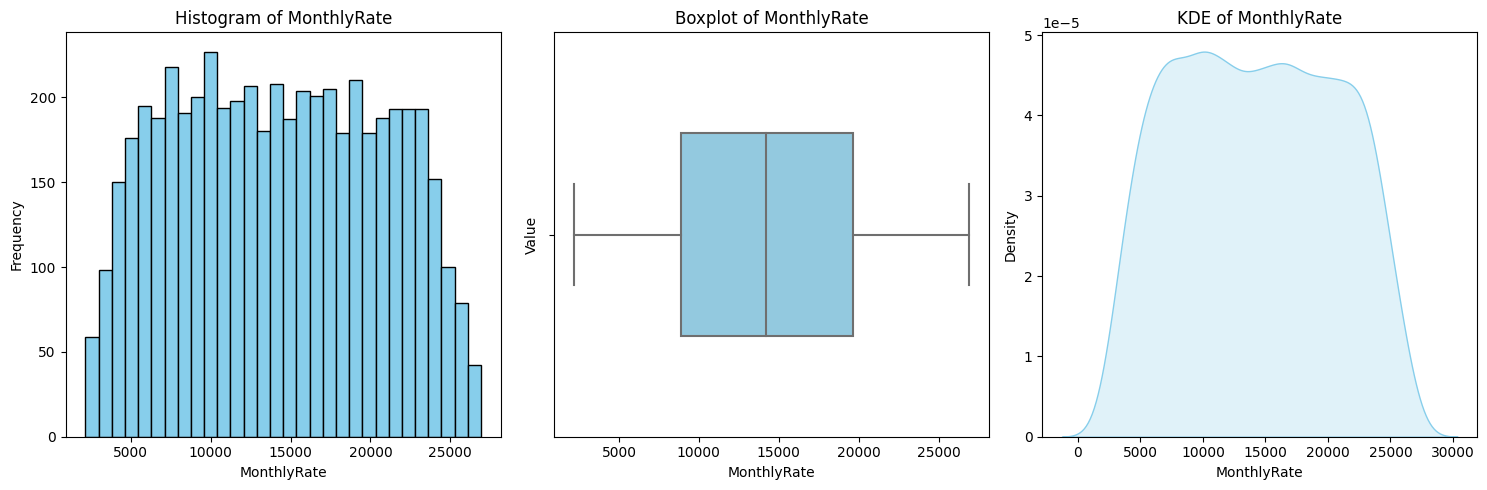

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



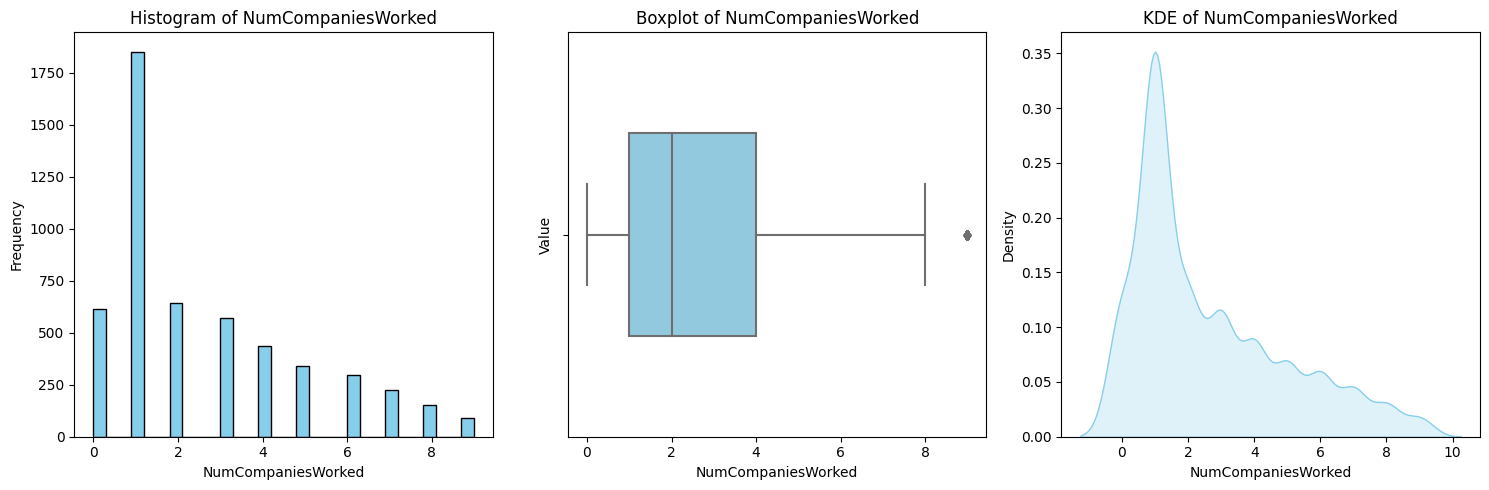

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



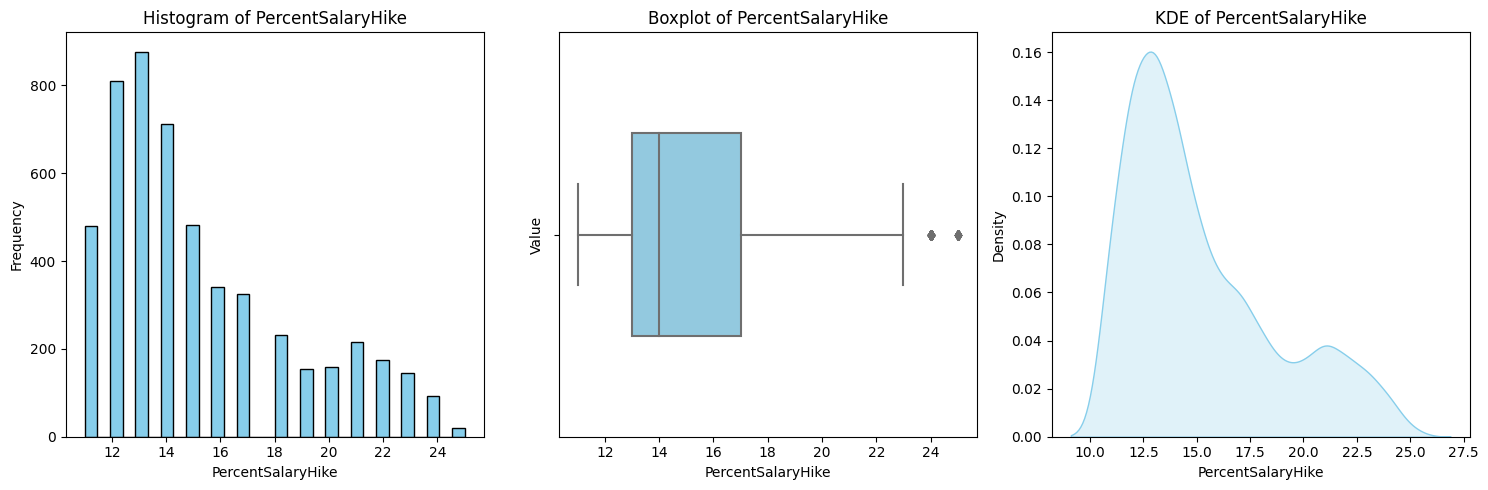

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



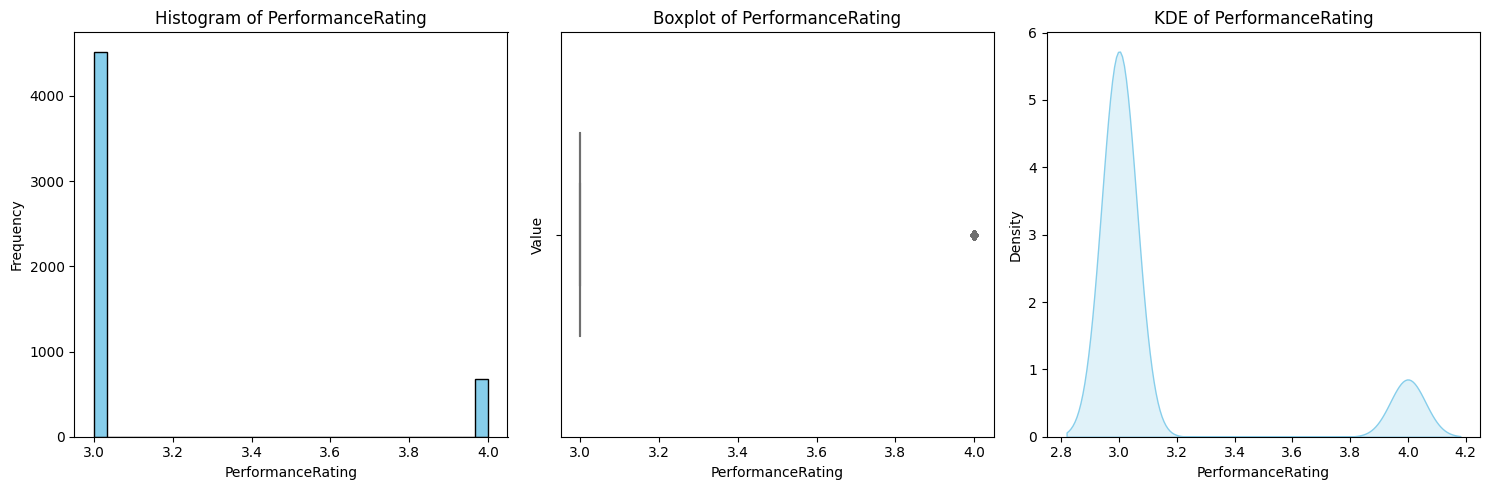

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



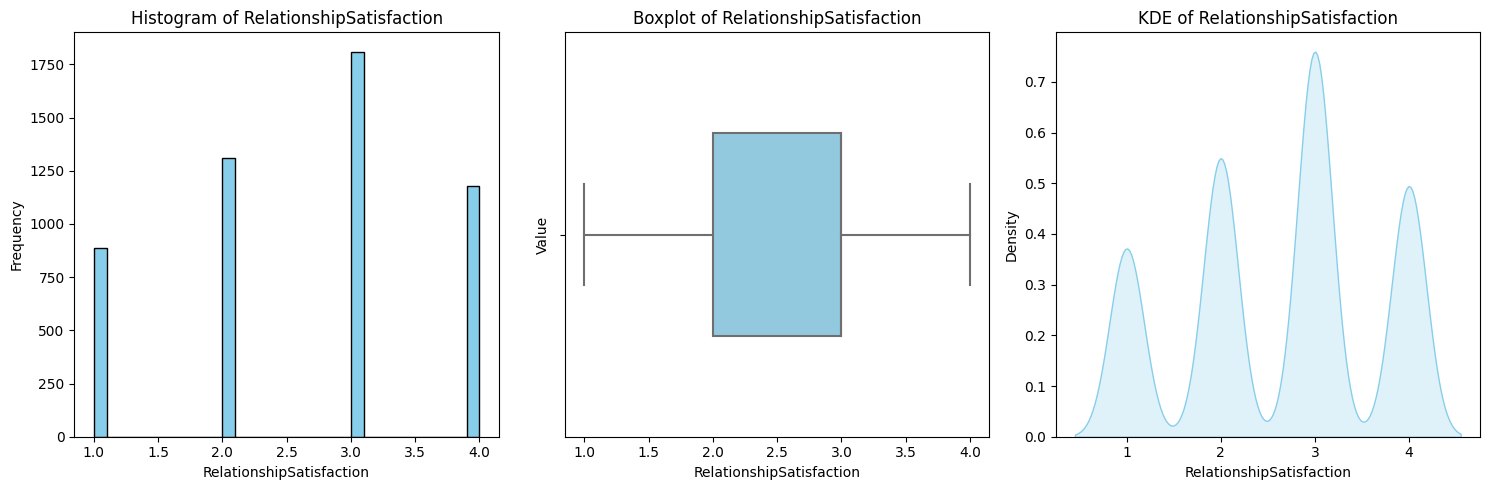

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/tmp/ipykernel_30/2384180935.py:22: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



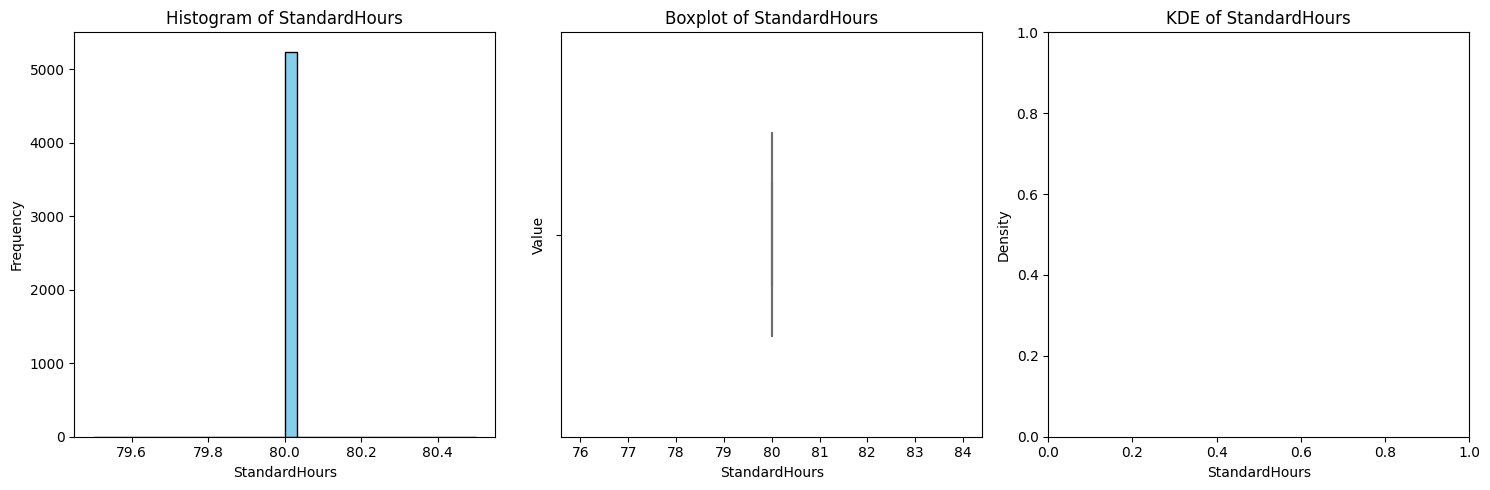

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



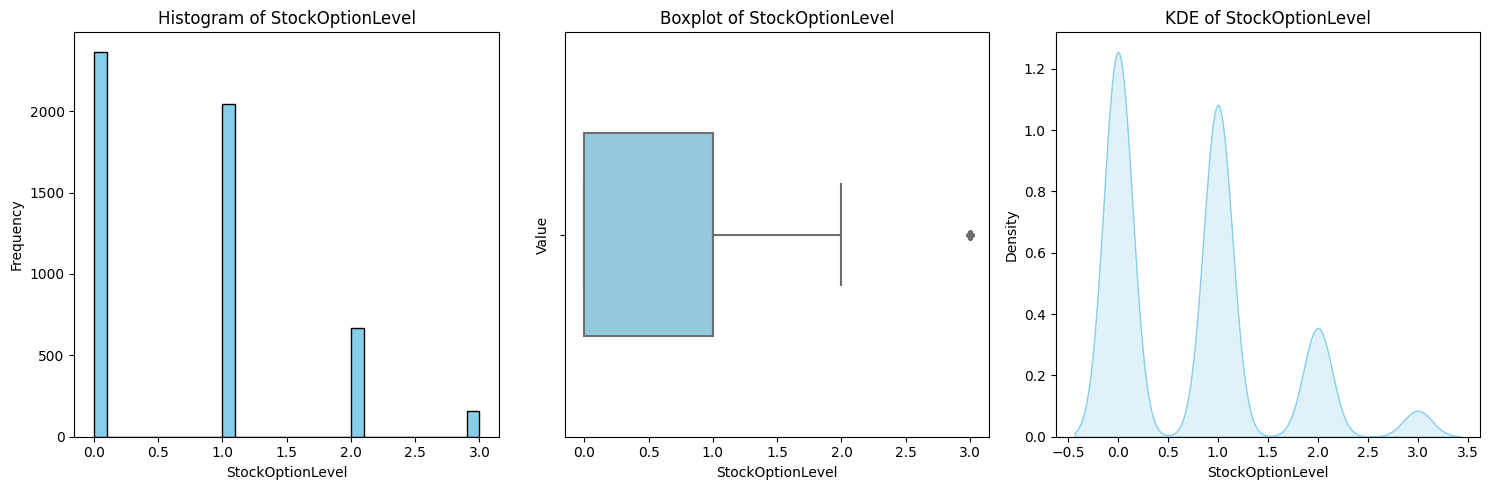

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



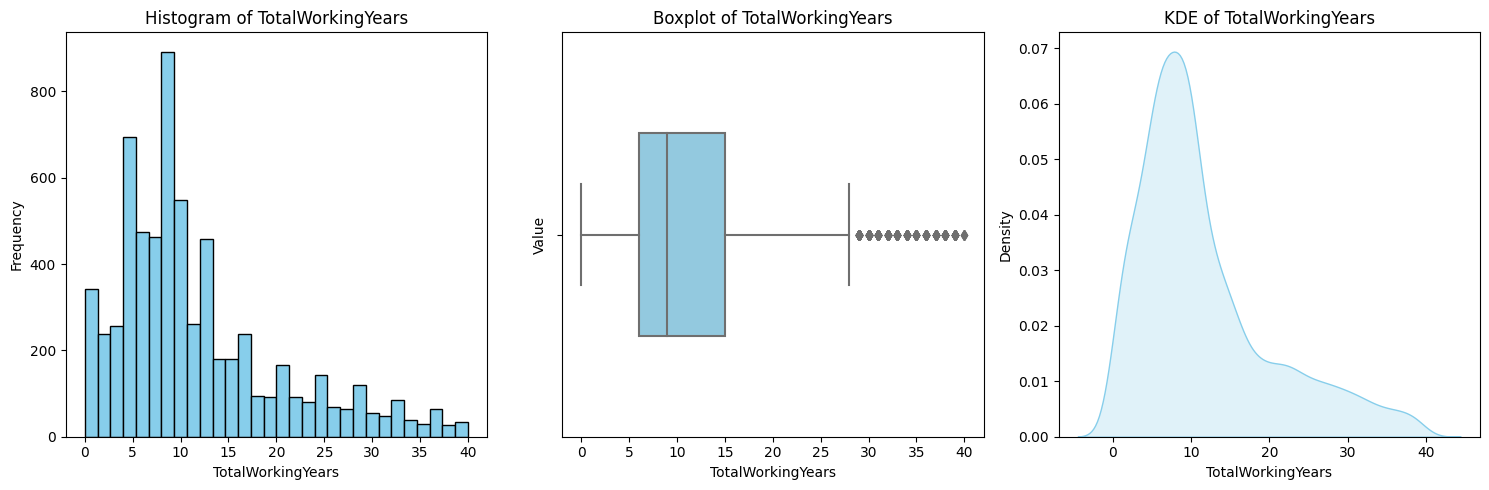

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



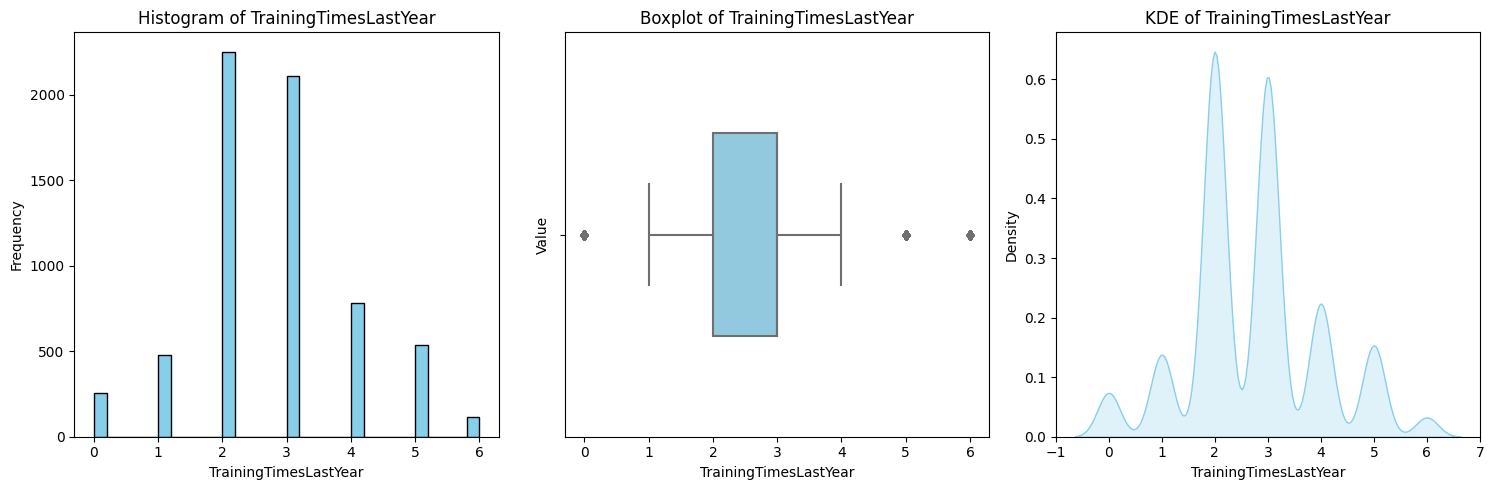

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



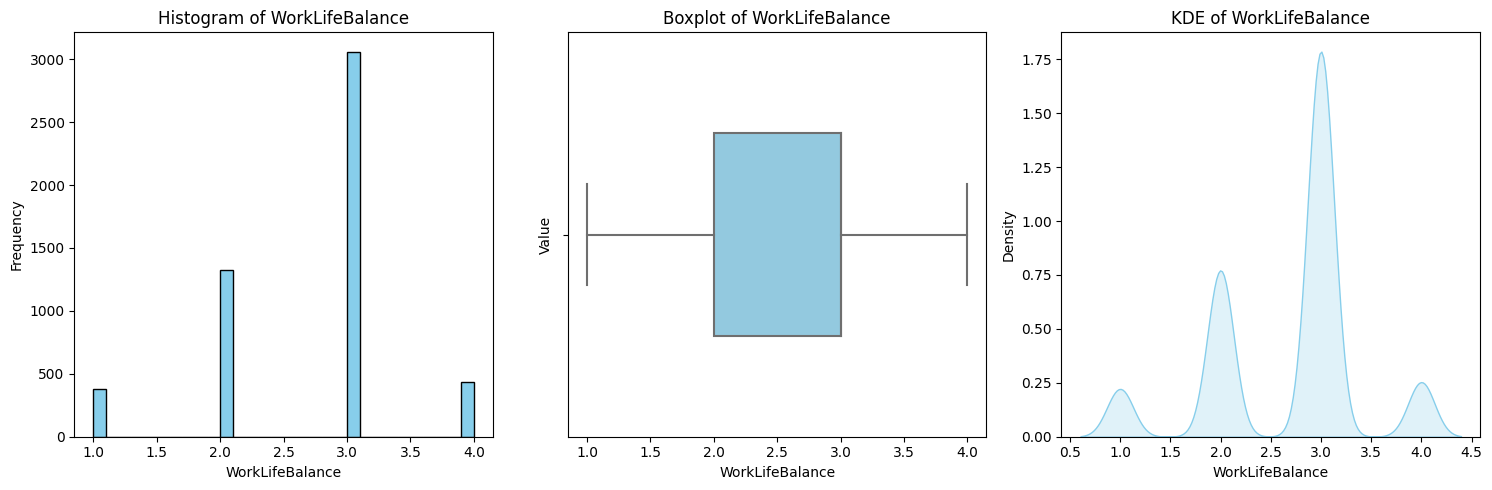

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



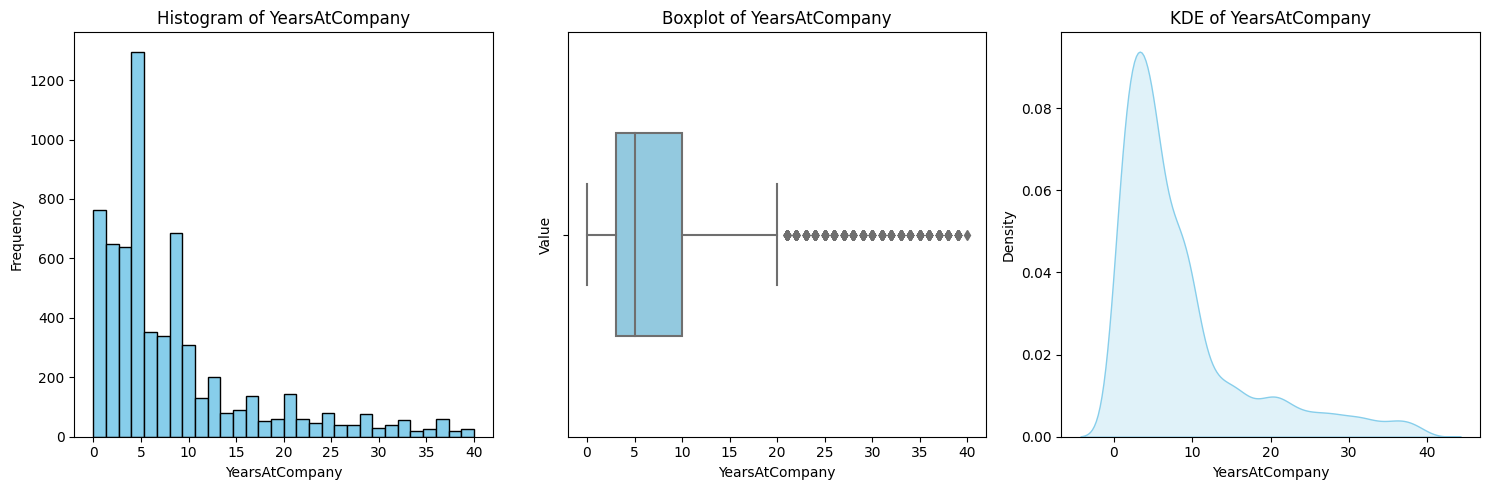

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



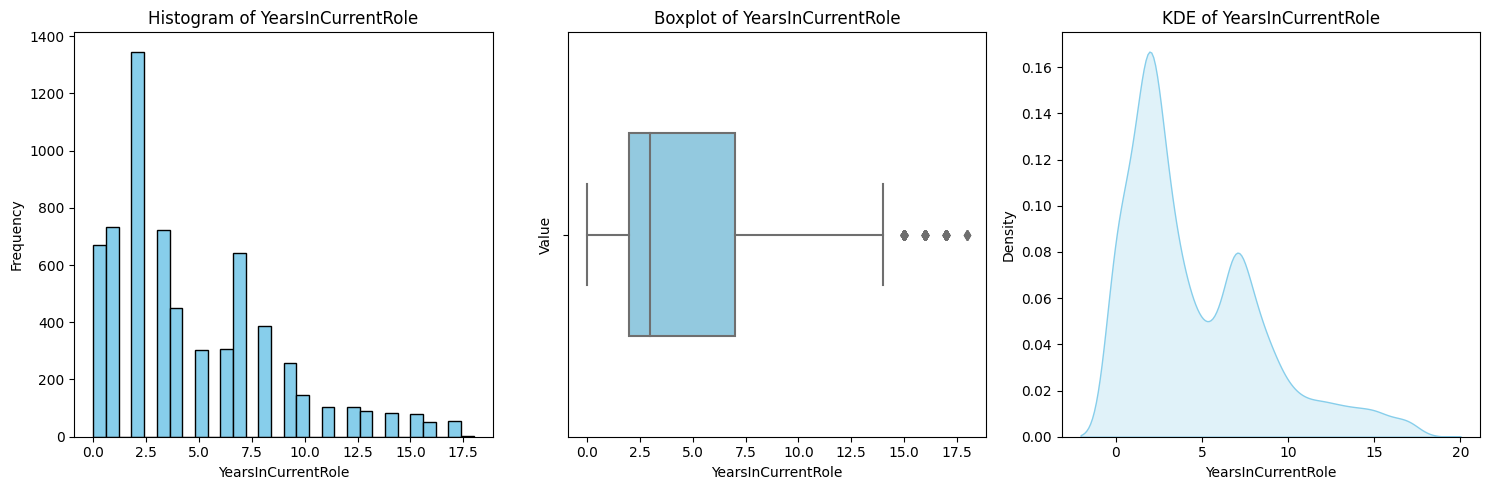

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



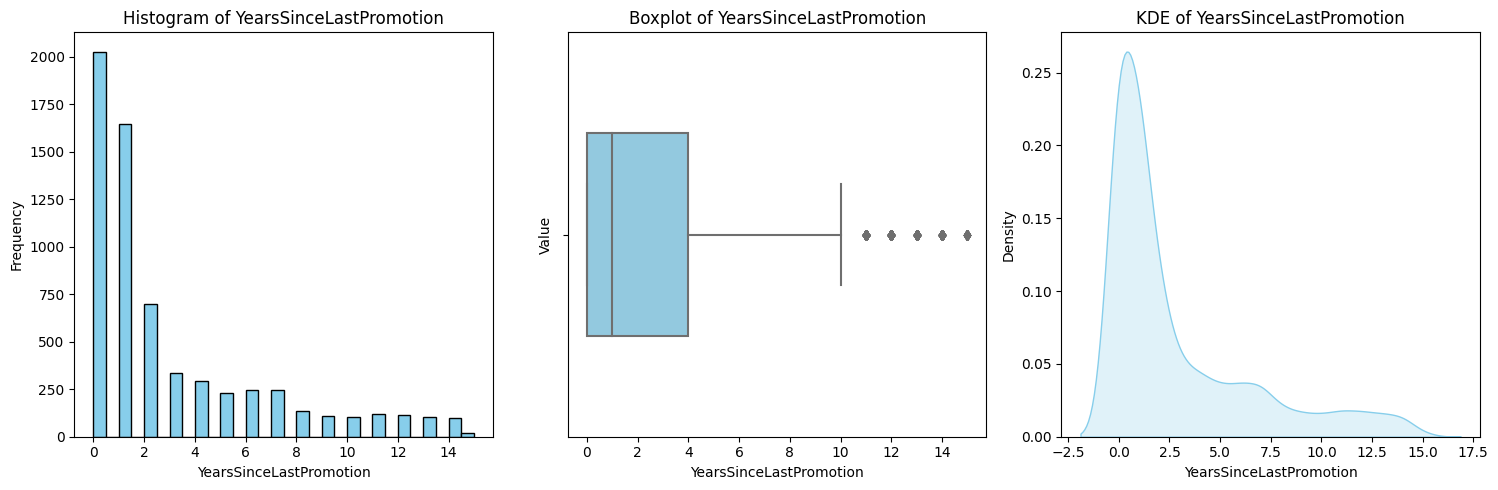

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



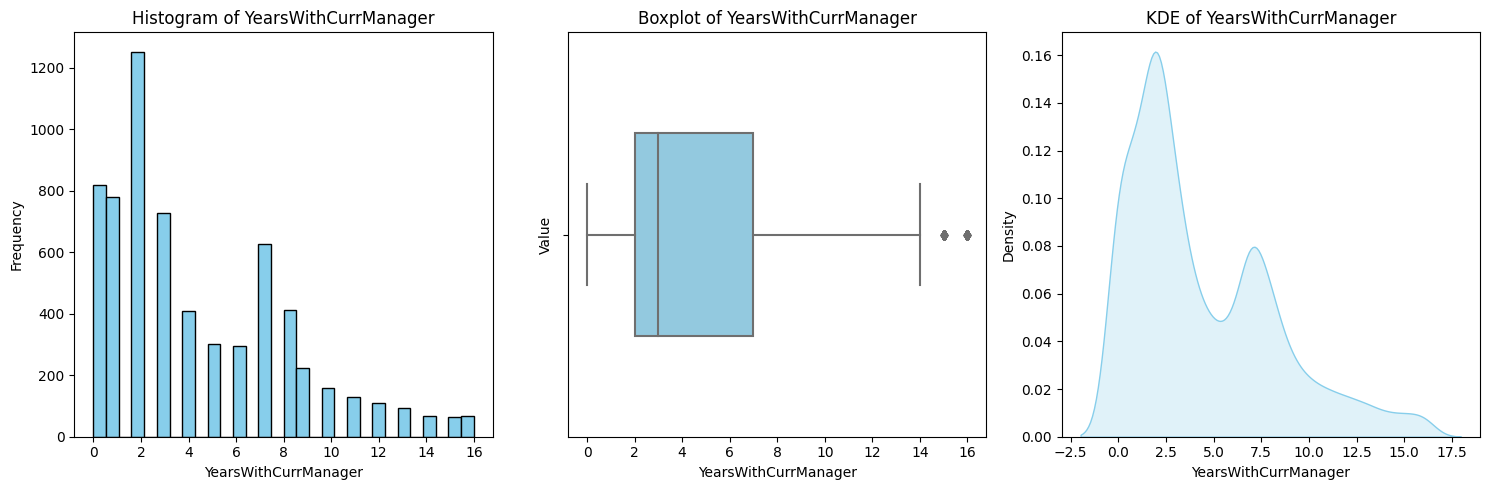

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



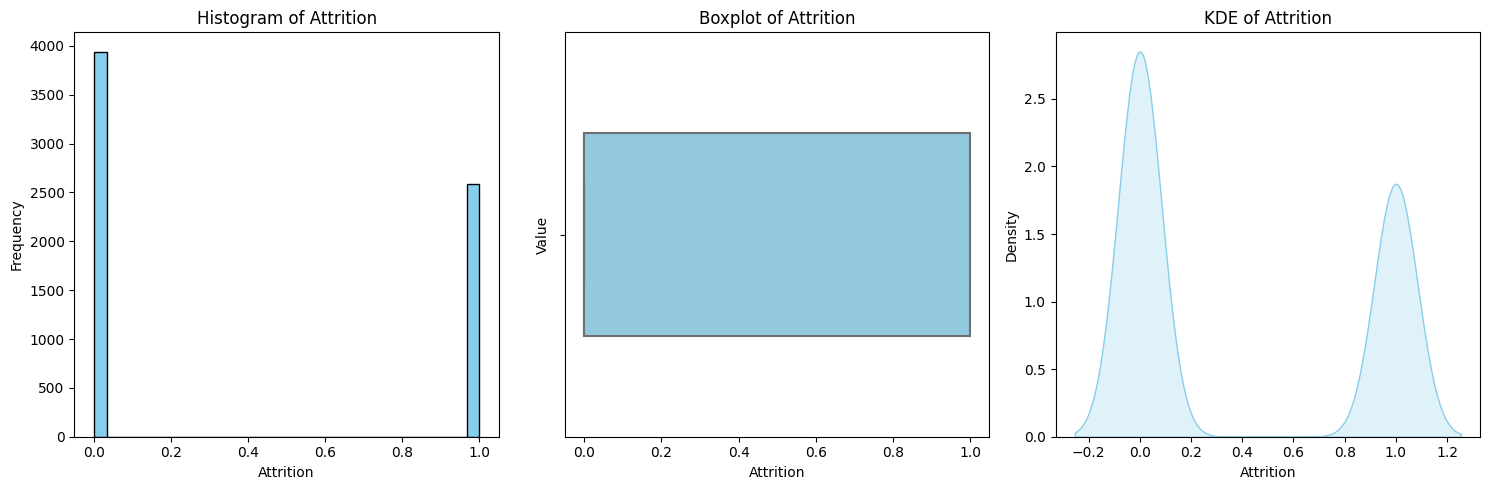

In [ ]:
num_cols = train.select_dtypes(include=np.number).columns
numerical_data = train[num_cols]
for col in numerical_data[1:]:
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    train[col].plot.hist(bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=train[col],color='skyblue', width=0.5)
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {col}')

    # KDE plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(train[col], color='skyblue', fill=True)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'KDE of {col}')

    plt.tight_layout()
    plt.show()

Berdasarkan hasil visualisasi data menggunakan histogram, boxplot, dan KDE plot, dapat ditarik beberapa kesimpulan penting mengenai distribusi data numerik. Histogram menunjukkan gambaran mengenai frekuensi distribusi data, sedangkan boxplot membantu untuk mencari nilai tengah, sebaran kuartil, dan keberadaan pencilan. KDE plot emberikan kurva yang lebih halus untuk memvisualisasikan kepadatan data sehingga pola distribusi dapat terlihat tanpa ada batasan bin. Kombinasi ketiga hal tersebut akan membantu dalam mengidentifikasi anomali.

### Analisis Bivariat untuk Kolom Numerikal dengan Attrition

/tmp/ipykernel_30/1454631711.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/tmp/ipykernel_30/1454631711.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/tmp/ipykernel_30/1454631711.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/tmp/ipykernel_30/1454631711.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/tmp/ipykernel_30/1454631711.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/tmp/ipykernel_30/1454631711.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/tmp/ipykernel_30/1454631711.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/tmp/ipykernel_30/1454631711.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/tmp/ipykernel_30/1454631711.py:3: UserWarning:

Ignoring `palette` because no `hue` var

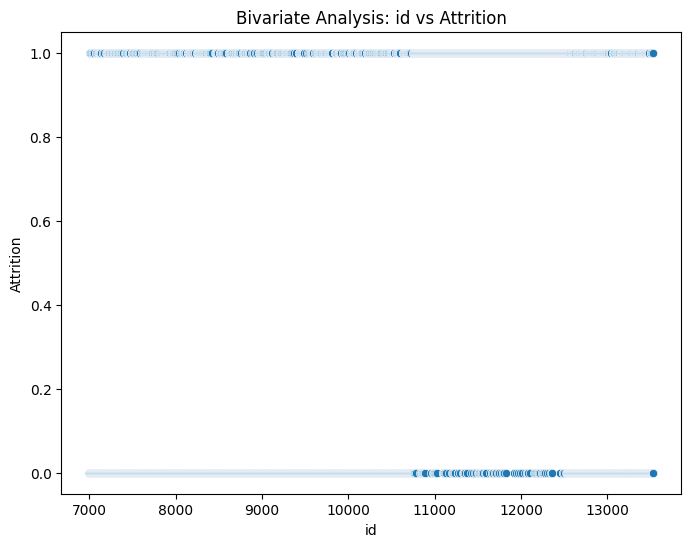

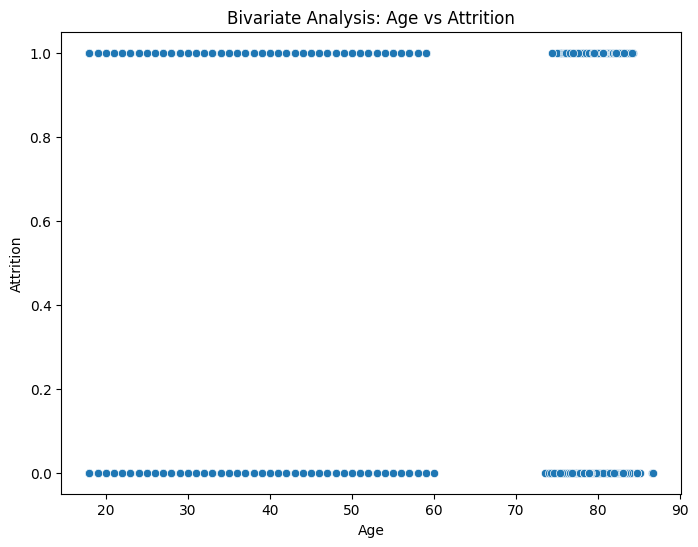

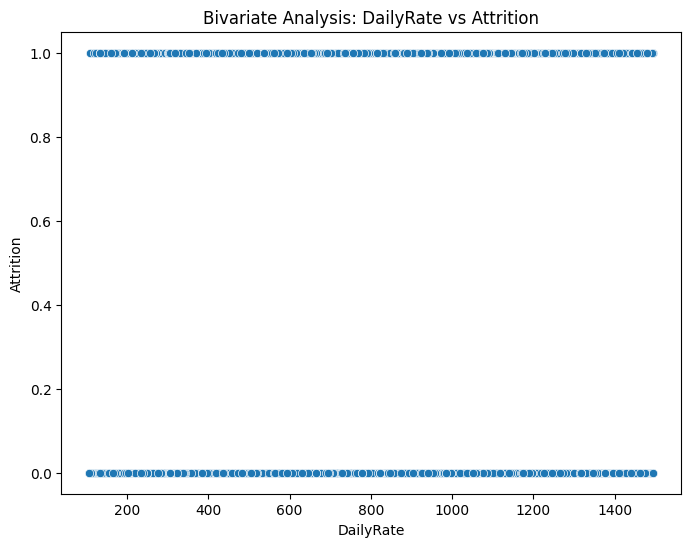

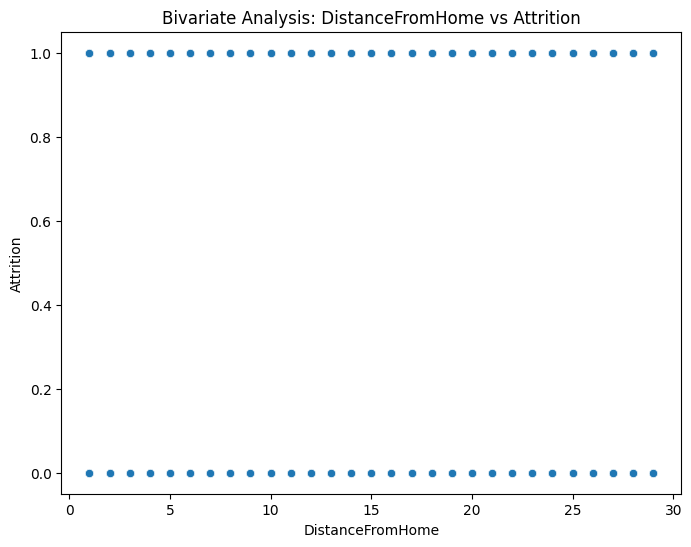

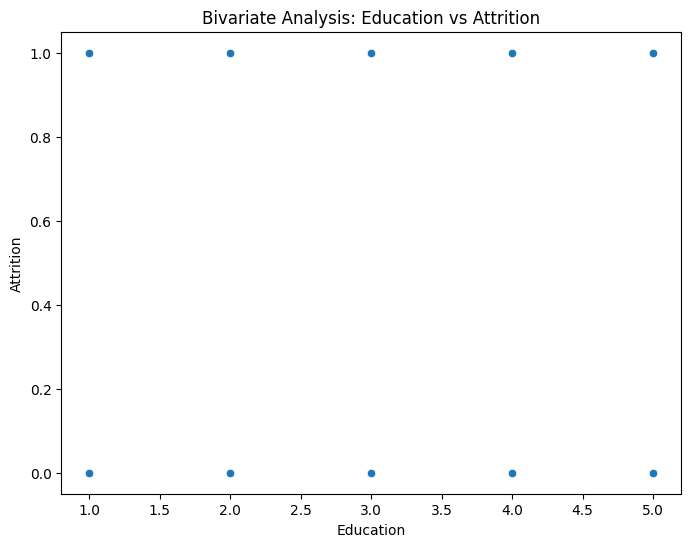

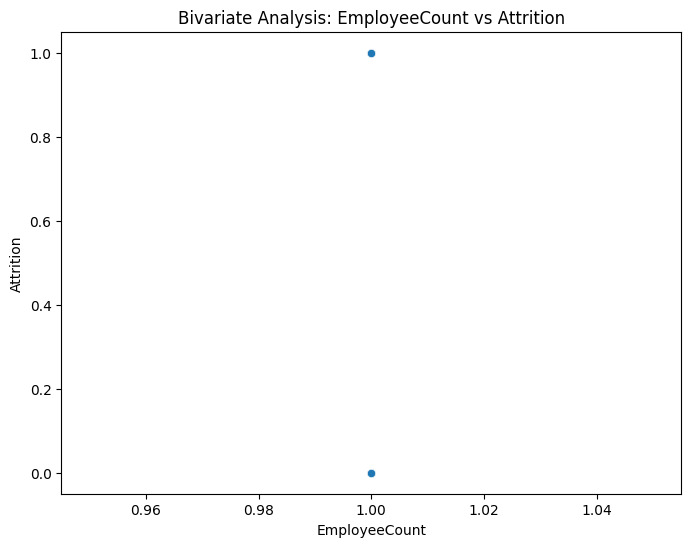

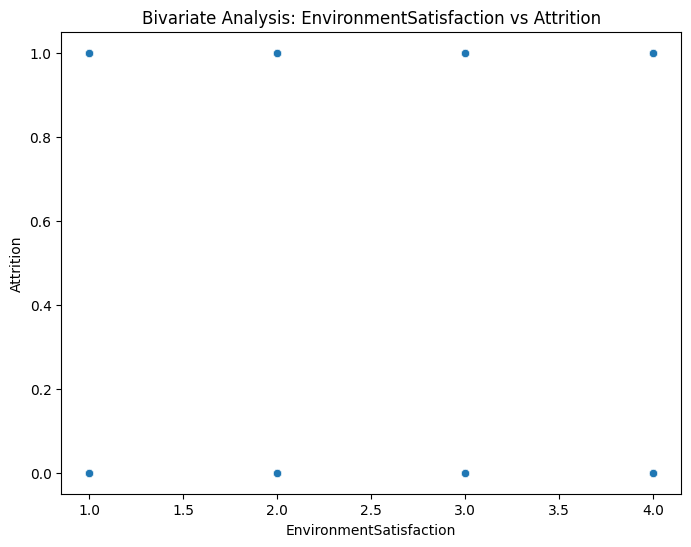

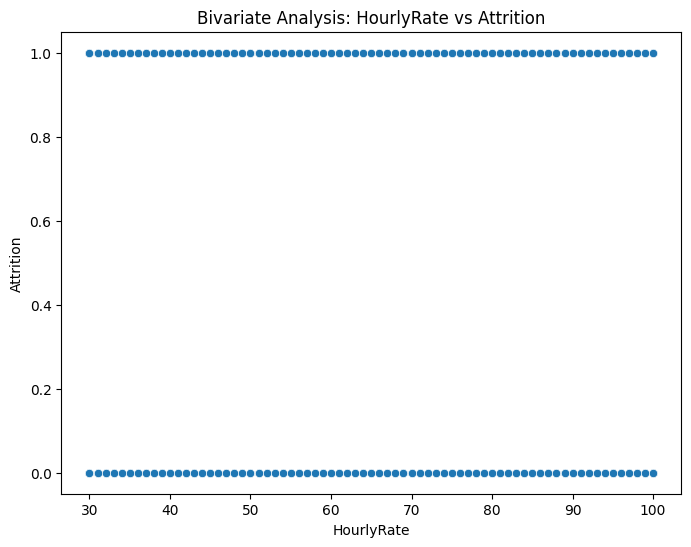

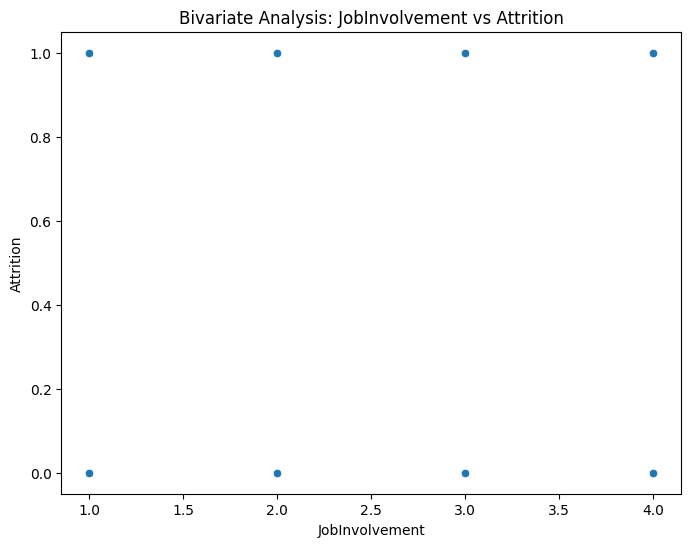

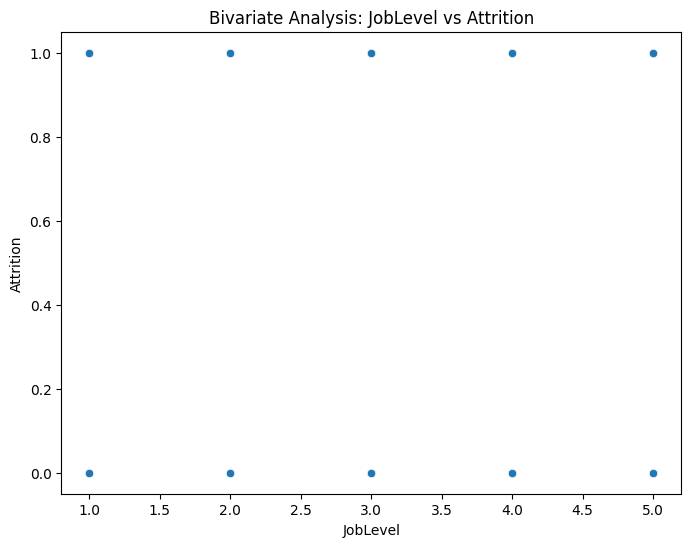

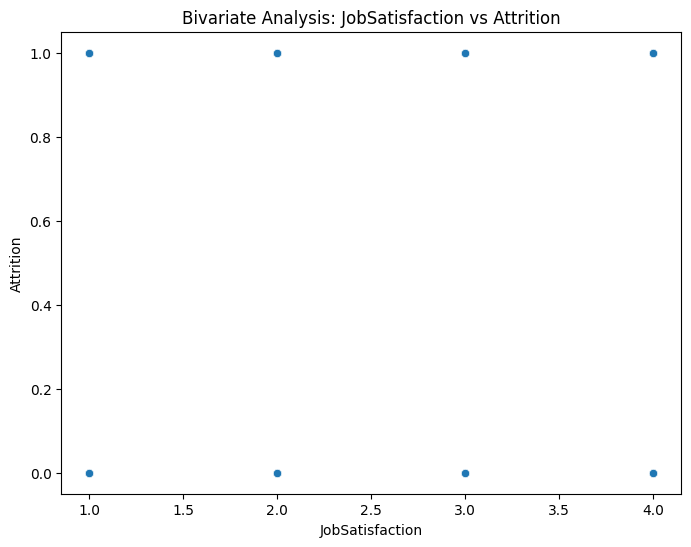

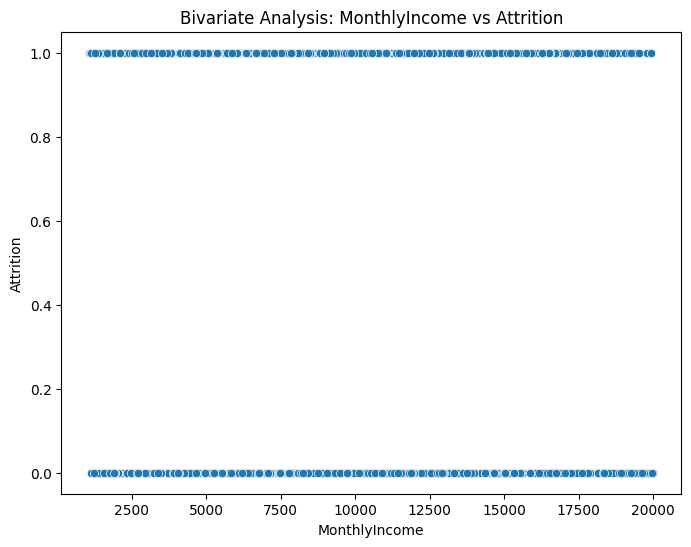

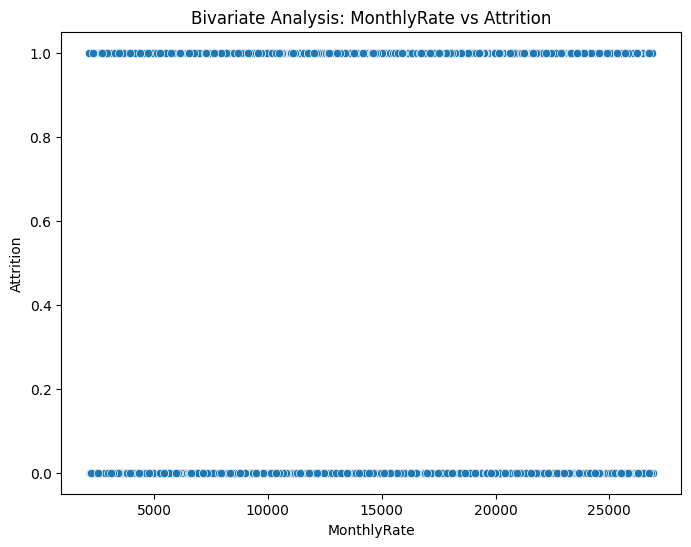

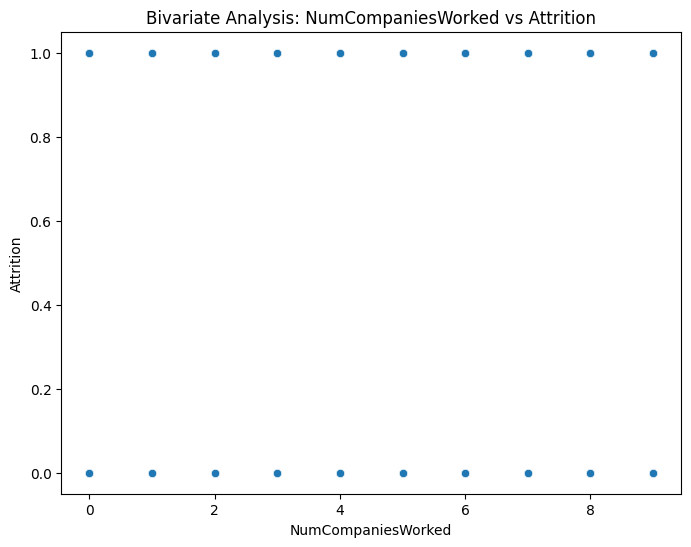

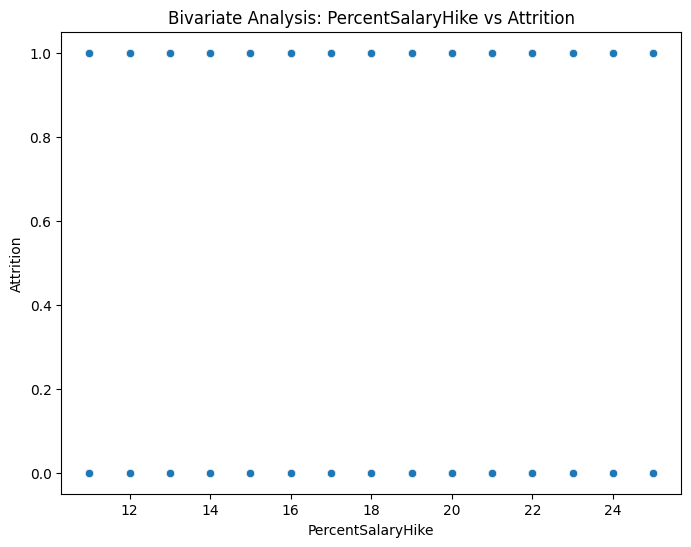

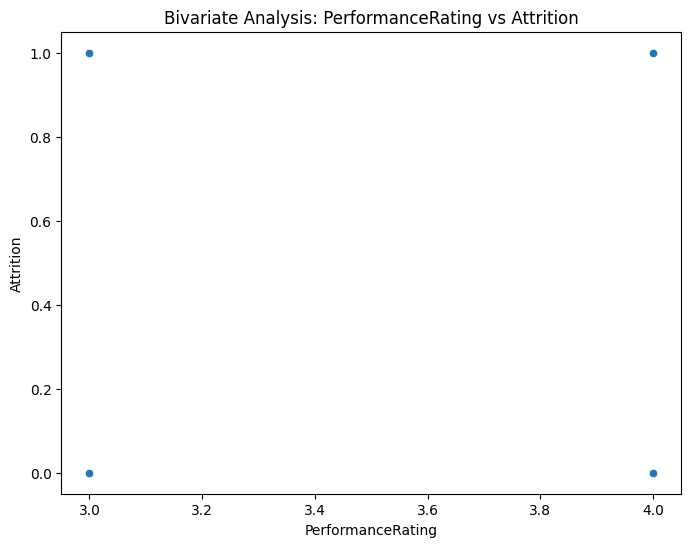

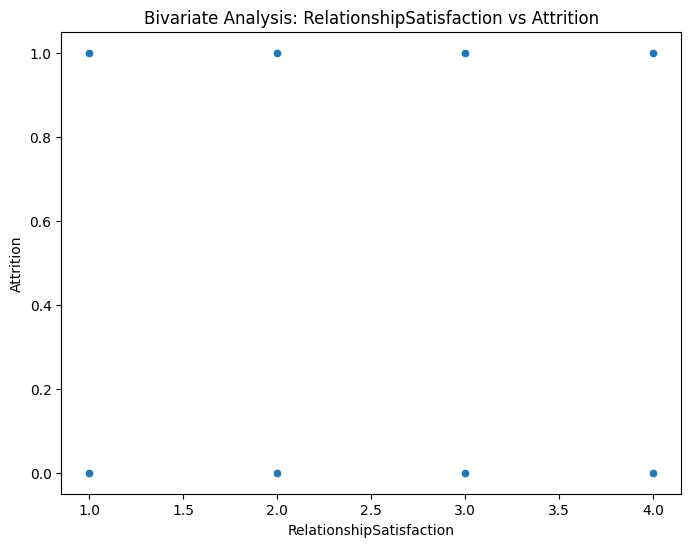

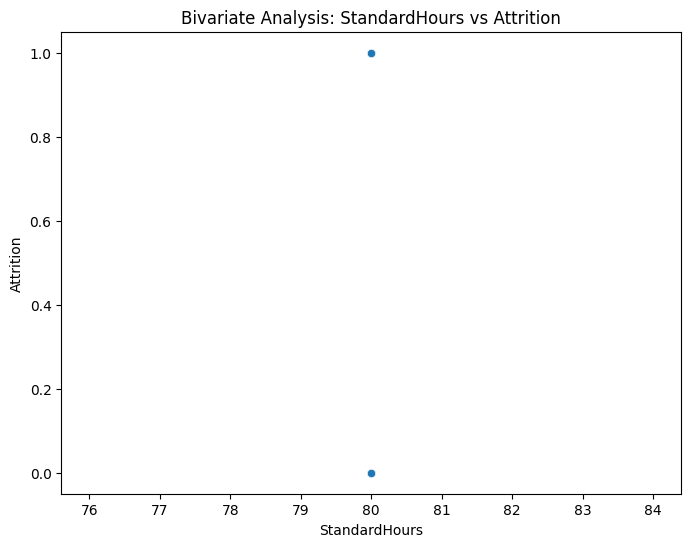

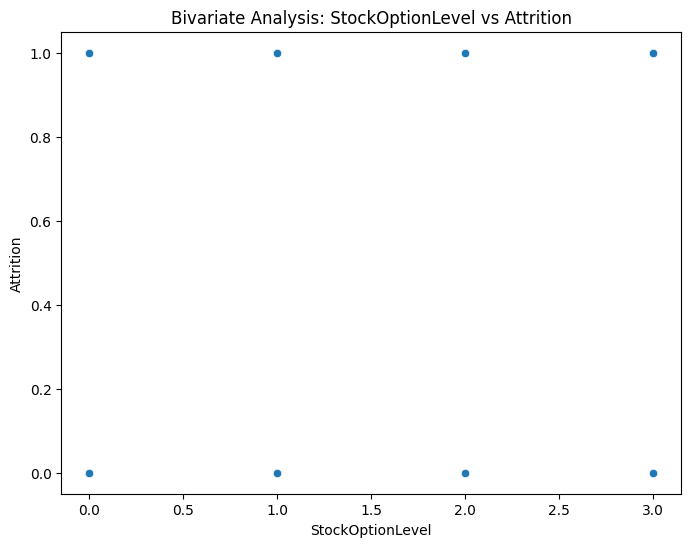

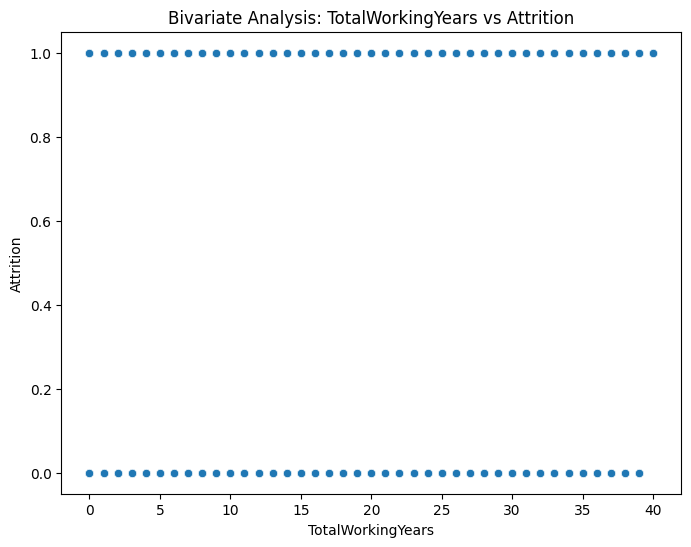

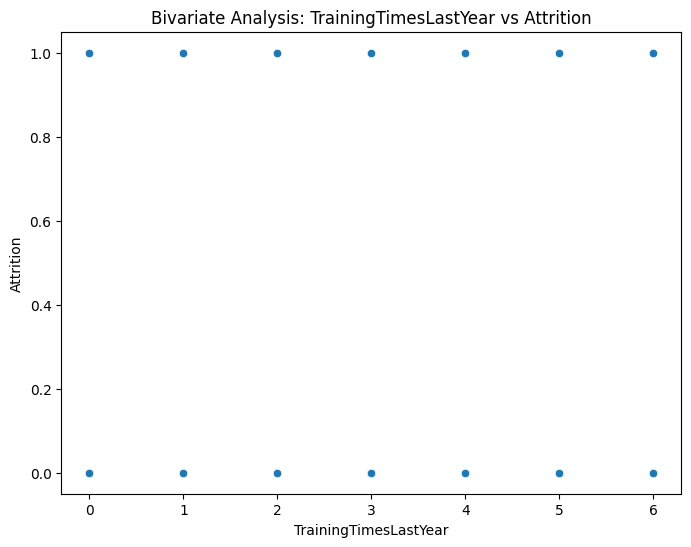

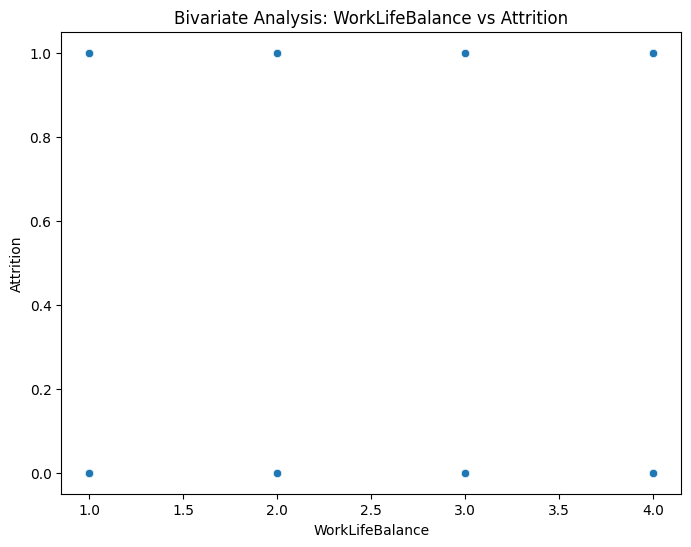

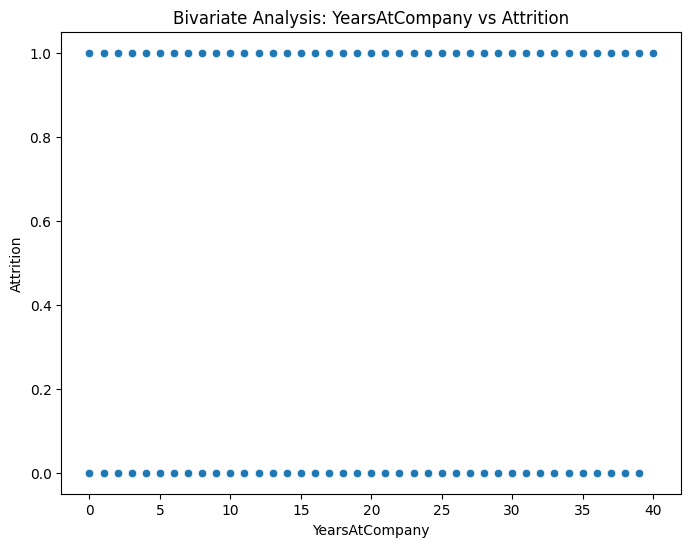

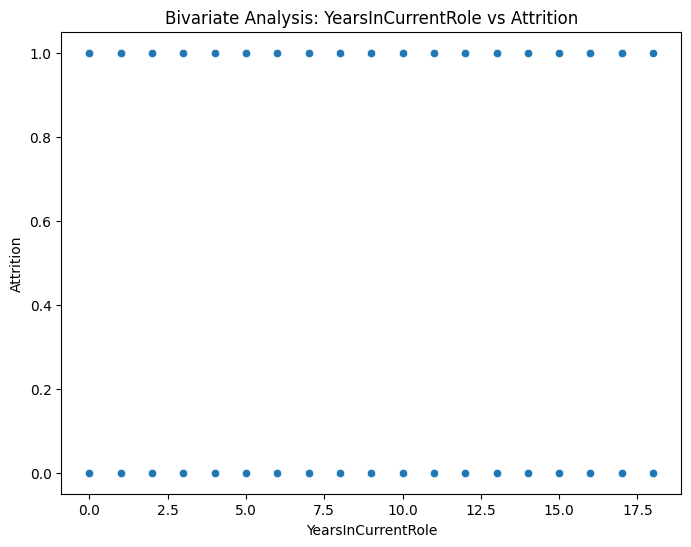

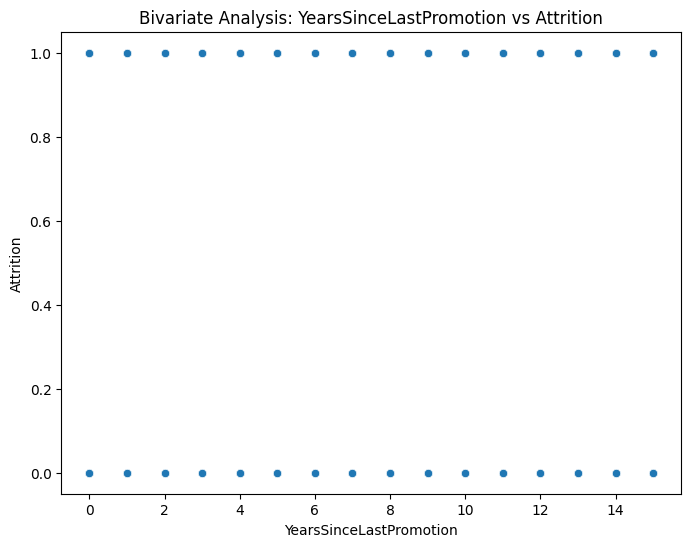

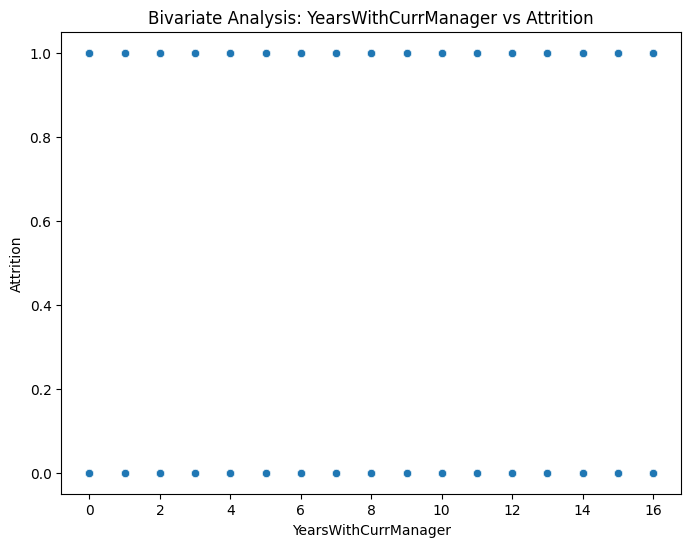

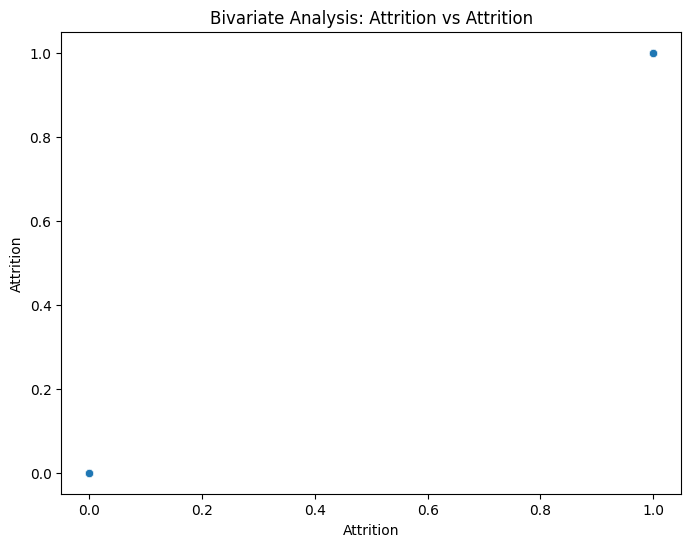

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='Attrition', data=train, palette='tab10')
    plt.title(f'Attrition vs {col}')
    plt.xlabel(col)
    plt.ylabel('Attrition')
    plt.title(f'Bivariate Analysis: {col} vs Attrition')

Bivariate Analysis digunakan untuk melihat hubungan antara kedua variabel dan melihat distribusi datanya. Distribusi data dapat dilihat melalui kepadatan titik-titiknya

Hubungan Attrition dan ID
Dapat dilihat bahwa titik-titik lebih padat di Attrition (0) dibandingkan titik-titik di Atrition (1). Artinya adalah lebih banyak karyawan yang tidak keluar.

Kasus selanjutnya seperti Hubungan antara DisctanceFromHome dan Attrition. Dapat dilihat bahwa titik-titiknya tersebar secara merata. Artinya pada Attrition (0), Distancenya beragam dalam rentang yang ditentukan, begitu juga pada Attrition (1). Hal ini juga memperlihatkan tidak adanya ketimpangan dimana salah satu dari mereka menunjukkan adanya titik-titik yang lebih padat.

### Attrition by Age Distribution

In [ ]:
fig = px.histogram(train, x='Age', color='Attrition', barmode='group', nbins=20, title='Attrition by Age')
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

Histogram ini menampilkan distribusi tingkat attrisi berdasarkan usia karyawan dan dapat dilihat adanya perbedaan signifikan dalam jumlah karyawan yang keluar dan yang tetap di setiap kelompok umur.

### Attrition by Gender

In [ ]:
fig = px.sunburst(train,path=['Gender','Attrition'], title='Gender Distribution')
fig.update_traces(textinfo='label+percent parent')
fig.update_layout(title_x=0.5)
fig.show()

Sunburst ini merupakan visualisasi mengenai distribusi gender diantara karyawan yang mengalami attrisi dan yang tidak. Melalui diagram ini, dapat terlihat hubungan antara jenis kelamin dan tingkat attrisi. 61% jenis kelamin karyawan merupakan laki-laki, sedangkan 39% sisanya memiliki jenis kelamin perempuan. Di antara laki-laki, 58% karyawan mengalami attris dan sisa 42% tidak. Sementara itu, di antara perempuan, 64% karyawan mengalami attris dan sisa 36% tidak.

### Attrition by Job Level

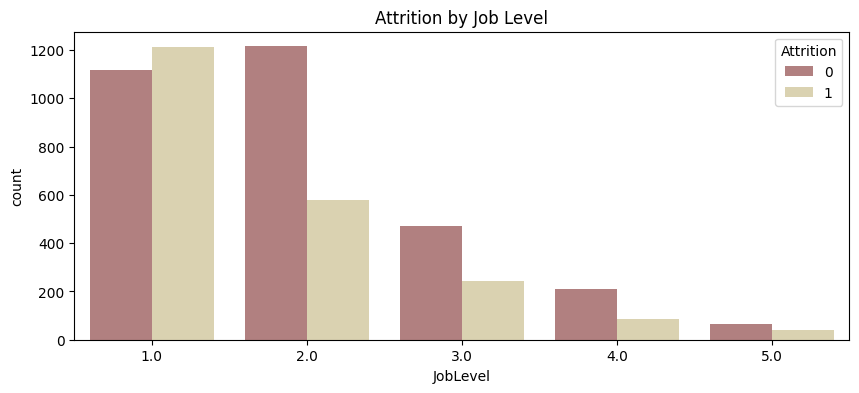

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="JobLevel", hue="Attrition", data=train, palette='pink')
plt.title("Attrition by Job Level")
plt.show()

Berdasarkan hasil plot, dapat terlihat adanya perbedaan signifikan dalam tingkat attrisi jika berdasarkan tingkat jabatan. Visualisasi ini juga menunjukkan distribusi proporsi antara karyawan yang mengalami attrisi dan yang tidak.

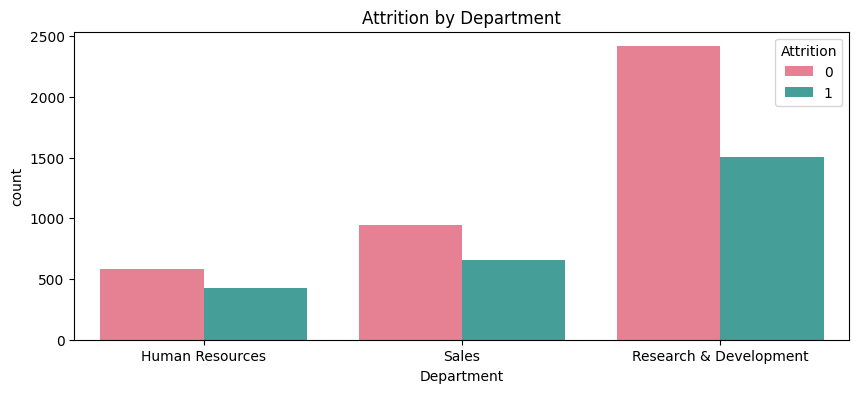

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="Department", hue="Attrition", data=train, palette ='husl')
plt.title("Attrition by Department")
plt.show()

Berdasarkan hasil plot, dapat terlihat adanya perbedaan signifikan dalam tingkat attrisi jika berdasarkan departemen. Visualisasi ini juga menunjukkan distribusi proporsi antara karyawan yang mengalami attrisi dan yang tidak pada setiap departemen. Melalui plot tersebut, dapat disimpulkan bahwa departemen Research & Development memiliki jumlah karyawan yang mengalami attrisi maupun yang tidak terbanyak. Hal tersebut menunjukkan bahwa departemen ini mungkin menghadapi tantangan dalam mempertahankan karyawan.

### Monthly Income by Attrition

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

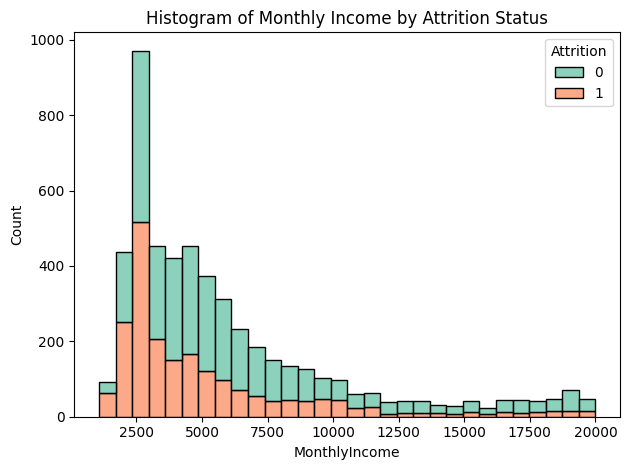

In [ ]:
sns.histplot(data=train, x='MonthlyIncome', hue='Attrition', multiple='stack', bins=30, palette='Set2')
plt.title('Histogram of Monthly Income by Attrition Status')

plt.tight_layout()
plt.show()

Melalui histogram yang dihasilkan, dapat disimpulkan bahwa terdapat hubungan antara distribusi pendapatan bulanan (Monthly Income) dan status attrisi (pergantian karyawan). Histogram ini memberikan gambaran jelas mengenai bagaimana pendapatan bulanan karyawan terdistribusi serta perbandingan antara karyawan yang mengalami attrisi dan yang tidak. Berdasarkan histogram juga dapat disimpulkan bahwa karyawan yang memiliki gaji lebih rendah cenderung akan meninggalkan perusahaan.

### Total Working Years by Attrition

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

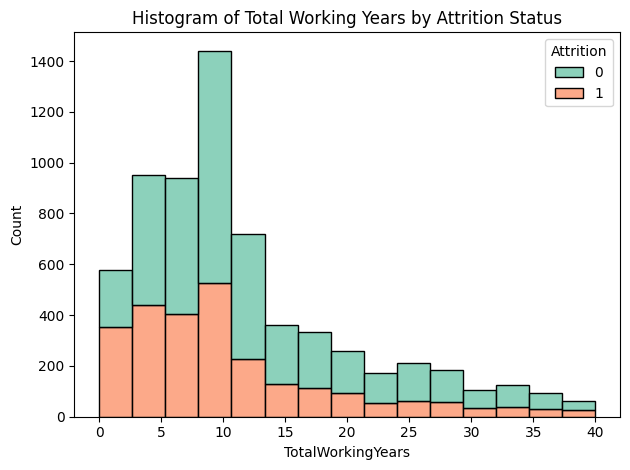

In [ ]:
sns.histplot(data=train, x='TotalWorkingYears', hue='Attrition', multiple='stack', bins=15, palette='Set2')
plt.title('Histogram of Total Working Years by Attrition Status')

plt.tight_layout()
plt.show()

Histogram menunjukkan bahwa  antara total tahun kerja (Total Working Years) dan attrisi. Hal tersebut dikarenakan histogram ini memberikan gambaran jelas mengenai sebaran total tahun kerja karyawan serta perbandingan antara karyawan yang mengalami attrisi dan yang tidak. Berdasarkan histogram juga dapat disimpulkan bahwa karyawan yang memiliki total working years lebih kecil akan meninggalkan perusahaan.

### Relationship Between Income and Experience

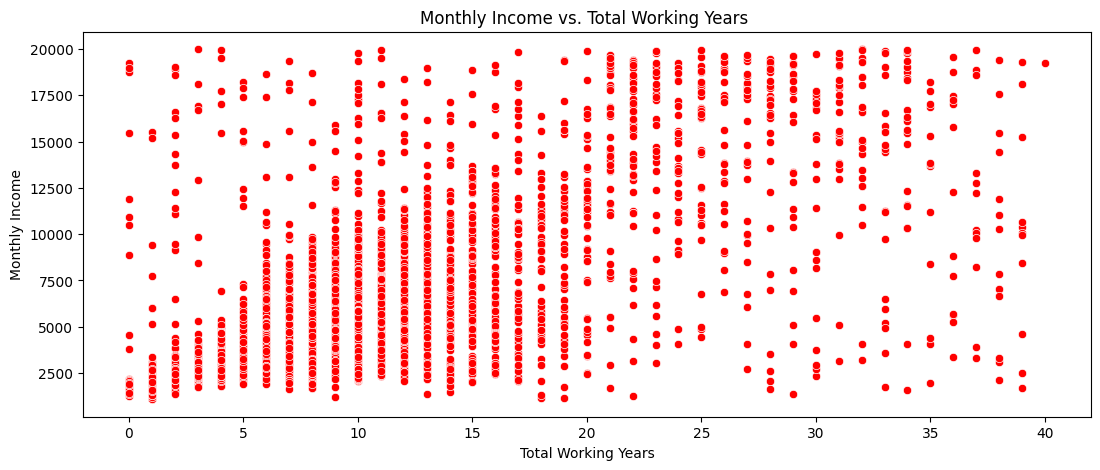

In [ ]:
plt.figure(figsize=(13, 5))

# Monthly Income vs. Total Working Years
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', data=train, c='r')
plt.title('Monthly Income vs. Total Working Years ')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.show()

Melalui scatter plot yang dihasilkan dapat disimpulkan bahwa terdapat hubungan antara total tahun kerja dan pendapat bulanan. Berdasarkan plot tersebut menunjukkan menunjukkan kecenderungan umum di mana karyawan dengan total tahun kerja yang lebih banyak cenderung memiliki pendapatan bulanan yang lebih tinggi. Namun, terdapat juga variasi yang signifikan di sekitar kecenderungan ini. Hal ini mengindikasikan bahwa meskipun pengalaman umumnya berkorelasi dengan peningkatan pendapatan, faktor-faktor lain seperti kinerja individu, peran pekerjaan, dan kebijakan perusahaan juga berperan dalam menentukan tingkat gaji.

## **Data Preprocessing**

### Menghapus Kolom-Kolom yang Hanya Mempunyai Satu Value Unik

In [ ]:
# Menghapus Kolom-Kolom yang Hanya Mempunyai Satu Value Unik
train.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)
test.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

**EmployeeCount**, **Over18**, dan **StandardHours** hanya mempunyai 1 value unik.

### Melakukan Encoding Terhadap Kolom-Kolom yang Memiliki Tipe Data Kategorikal

In [ ]:
# Mengecek Kolom-Kolom yang Mempunyai Tipe Data Kategorikal
print(train.select_dtypes(include=['object']).columns)
print(test.select_dtypes(include=['object']).columns)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')


Dalam melakukan encoding di dalam data kategorikal, kami menggunakan **One-Hot Encoding**. **One-Hot Encoding** digunakan untuk mengubah data kategori (categorical data) menjadi bentuk yang dapat digunakan oleh model machine learning. Banyak algoritma machine learning, terutama yang berbasis numerik (seperti regresi linier, SVM, dan decision tree), tidak bisa bekerja dengan data yang berupa teks atau kategori, sehingga kita perlu mengubah data tersebut menjadi bentuk numerik. Setiap kategori diubah menjadi vektor biner, di mana nilai 1 menunjukkan bahwa baris tersebut termasuk dalam kategori tersebut, dan nilai 0 menunjukkan tidak. **One-Hot Encoding** juga mencegah asumsi urutan yang salah. Misalnya, jika kita hanya mengubah kategori menjadi angka biasa, seperti "Red" menjadi 1, "Blue" menjadi 2, dan "Green" menjadi 3, model bisa keliru menganggap bahwa ada hierarki atau urutan antar kategori, padahal tidak ada. Dengan **One-Hot Encoding**, setiap kategori direpresentasikan sebagai kolom terpisah tanpa nilai yang saling terkait. Oleh karena itu, kami memilih **One-Hot Encoding** sebagai teknik encoding yang baik untuk mendapatkan hasil model yang optimal.

In [ ]:
# Daftar Kolom yang Ingin di-encode
columns_to_encode = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'OverTime', 'JobRole']

# Lakukan One-Hot Encoding
train_encoded = pd.get_dummies(train, columns=columns_to_encode, drop_first=True)
test_encoded = pd.get_dummies(test, columns=columns_to_encode, drop_first=True)

# Pastikan Kedua DataFrame Memiliki Jumlah Kolom yang Sama
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

# Tampilkan Hasil Encoding
print(train_encoded.head())
print(test_encoded.head())

     id   Age  DailyRate  DistanceFromHome  Education  \
0  7000  44.0        NaN               NaN        NaN   
1  7001  28.0      949.0               7.0        4.0   
2  7002  26.0      566.0              10.0        3.0   
3  7003  34.0      512.0               3.0        3.0   
4  7004  34.0      475.0              12.0        1.0   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                      NaN         NaN             NaN       NaN   
1                      3.0        83.0             3.0       1.0   
2                      3.0        46.0             3.0       2.0   
3                      1.0        47.0             2.0       3.0   
4                      2.0        51.0             3.0       1.0   

   JobSatisfaction  ...  MaritalStatus_Single  OverTime_Yes  \
0              NaN  ...                  True          True   
1              4.0  ...                 False          True   
2              4.0  ...                  True         False

### Imputasi untuk Setiap Kolom

In [ ]:
# Buat KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Imputasi untuk train dan test Set
train_imputed = knn_imputer.fit_transform(train_encoded)
test_imputed = knn_imputer.transform(test_encoded)

# Ubah Hasil Imputasi Kembali ke DataFrame train dan Test
train_imputed_df = pd.DataFrame(train_imputed, columns=train_encoded.columns)
test_imputed_df = pd.DataFrame(test_imputed, columns=test_encoded.columns)

# Tampilkan hasil
print(train_imputed_df.head())
print(test_imputed_df.head())

       id   Age  DailyRate  DistanceFromHome  Education  \
0  7000.0  44.0      995.2               5.4        2.6   
1  7001.0  28.0      949.0               7.0        4.0   
2  7002.0  26.0      566.0              10.0        3.0   
3  7003.0  34.0      512.0               3.0        3.0   
4  7004.0  34.0      475.0              12.0        1.0   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                      2.0        61.6             3.0       2.6   
1                      3.0        83.0             3.0       1.0   
2                      3.0        46.0             3.0       2.0   
3                      1.0        47.0             2.0       3.0   
4                      2.0        51.0             3.0       1.0   

   JobSatisfaction  ...  MaritalStatus_Single  OverTime_Yes  \
0              3.4  ...                   1.0           1.0   
1              4.0  ...                   0.0           1.0   
2              4.0  ...                   1.0  

Kita menggunakan **KNN imputation** karena metode ini dapat mengisi nilai yang hilang dengan mempertimbangkan kemiripan antar sampel dalam dataset, sehingga estimasi yang dihasilkan lebih tepat dan konteksual. Metode ini lebih baik dibandingkan imputasi sederhana seperti mean atau median karena memanfaatkan hubungan antar fitur, menghasilkan nilai yang lebih realistis, dan dapat menangani berbagai jenis data. **Pemilihan 5 neighbors** adalah pilihan umum yang memberikan keseimbangan antara bias dan variance; jika terlalu sedikit neighbors, hasil bisa dipengaruhi outlier, sementara terlalu banyak bisa membuat estimasi menjadi terlalu rata. Dengan 5 neighbors, kita berharap mendapatkan estimasi yang stabil dan akurat.

In [ ]:
# Mengupdate DataFrame train dan test dengan Hasil Imputasi
train[train_encoded.columns] = train_imputed_df
test[test_encoded.columns] = test_imputed_df

In [ ]:
# Hapus kolom kategorikal yang sudah diinput
# Daftar kolom yang ingin dihapus
columns_to_drop = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Menghapus kolom dari DataFrame train
train.drop(columns=columns_to_drop, inplace=True)

# Jika Anda juga ingin menghapus kolom dari DataFrame test
test.drop(columns=columns_to_drop, inplace=True)

### Analisis Korelasi Menggunakan Heatmap

Attrition                            1.000000
id                                   0.355756
OverTime_Yes                         0.196046
MaritalStatus_Single                 0.145034
BusinessTravel_Travel_Frequently     0.100318
EducationField_Marketing             0.082642
JobRole_Sales Representative         0.080842
JobRole_Laboratory Technician        0.056838
Gender_Male                          0.051080
JobRole_Human Resources              0.050781
DistanceFromHome                     0.045303
Department_Sales                     0.017087
Education                            0.014307
EducationField_Other                 0.010941
JobRole_Sales Executive              0.009849
RelationshipSatisfaction             0.008793
MonthlyRate                          0.007420
BusinessTravel_Travel_Rarely         0.002581
JobRole_Research Scientist           0.000289
EducationField_Medical              -0.002377
EducationField_Technical Degree     -0.005389
JobRole_Research Director         

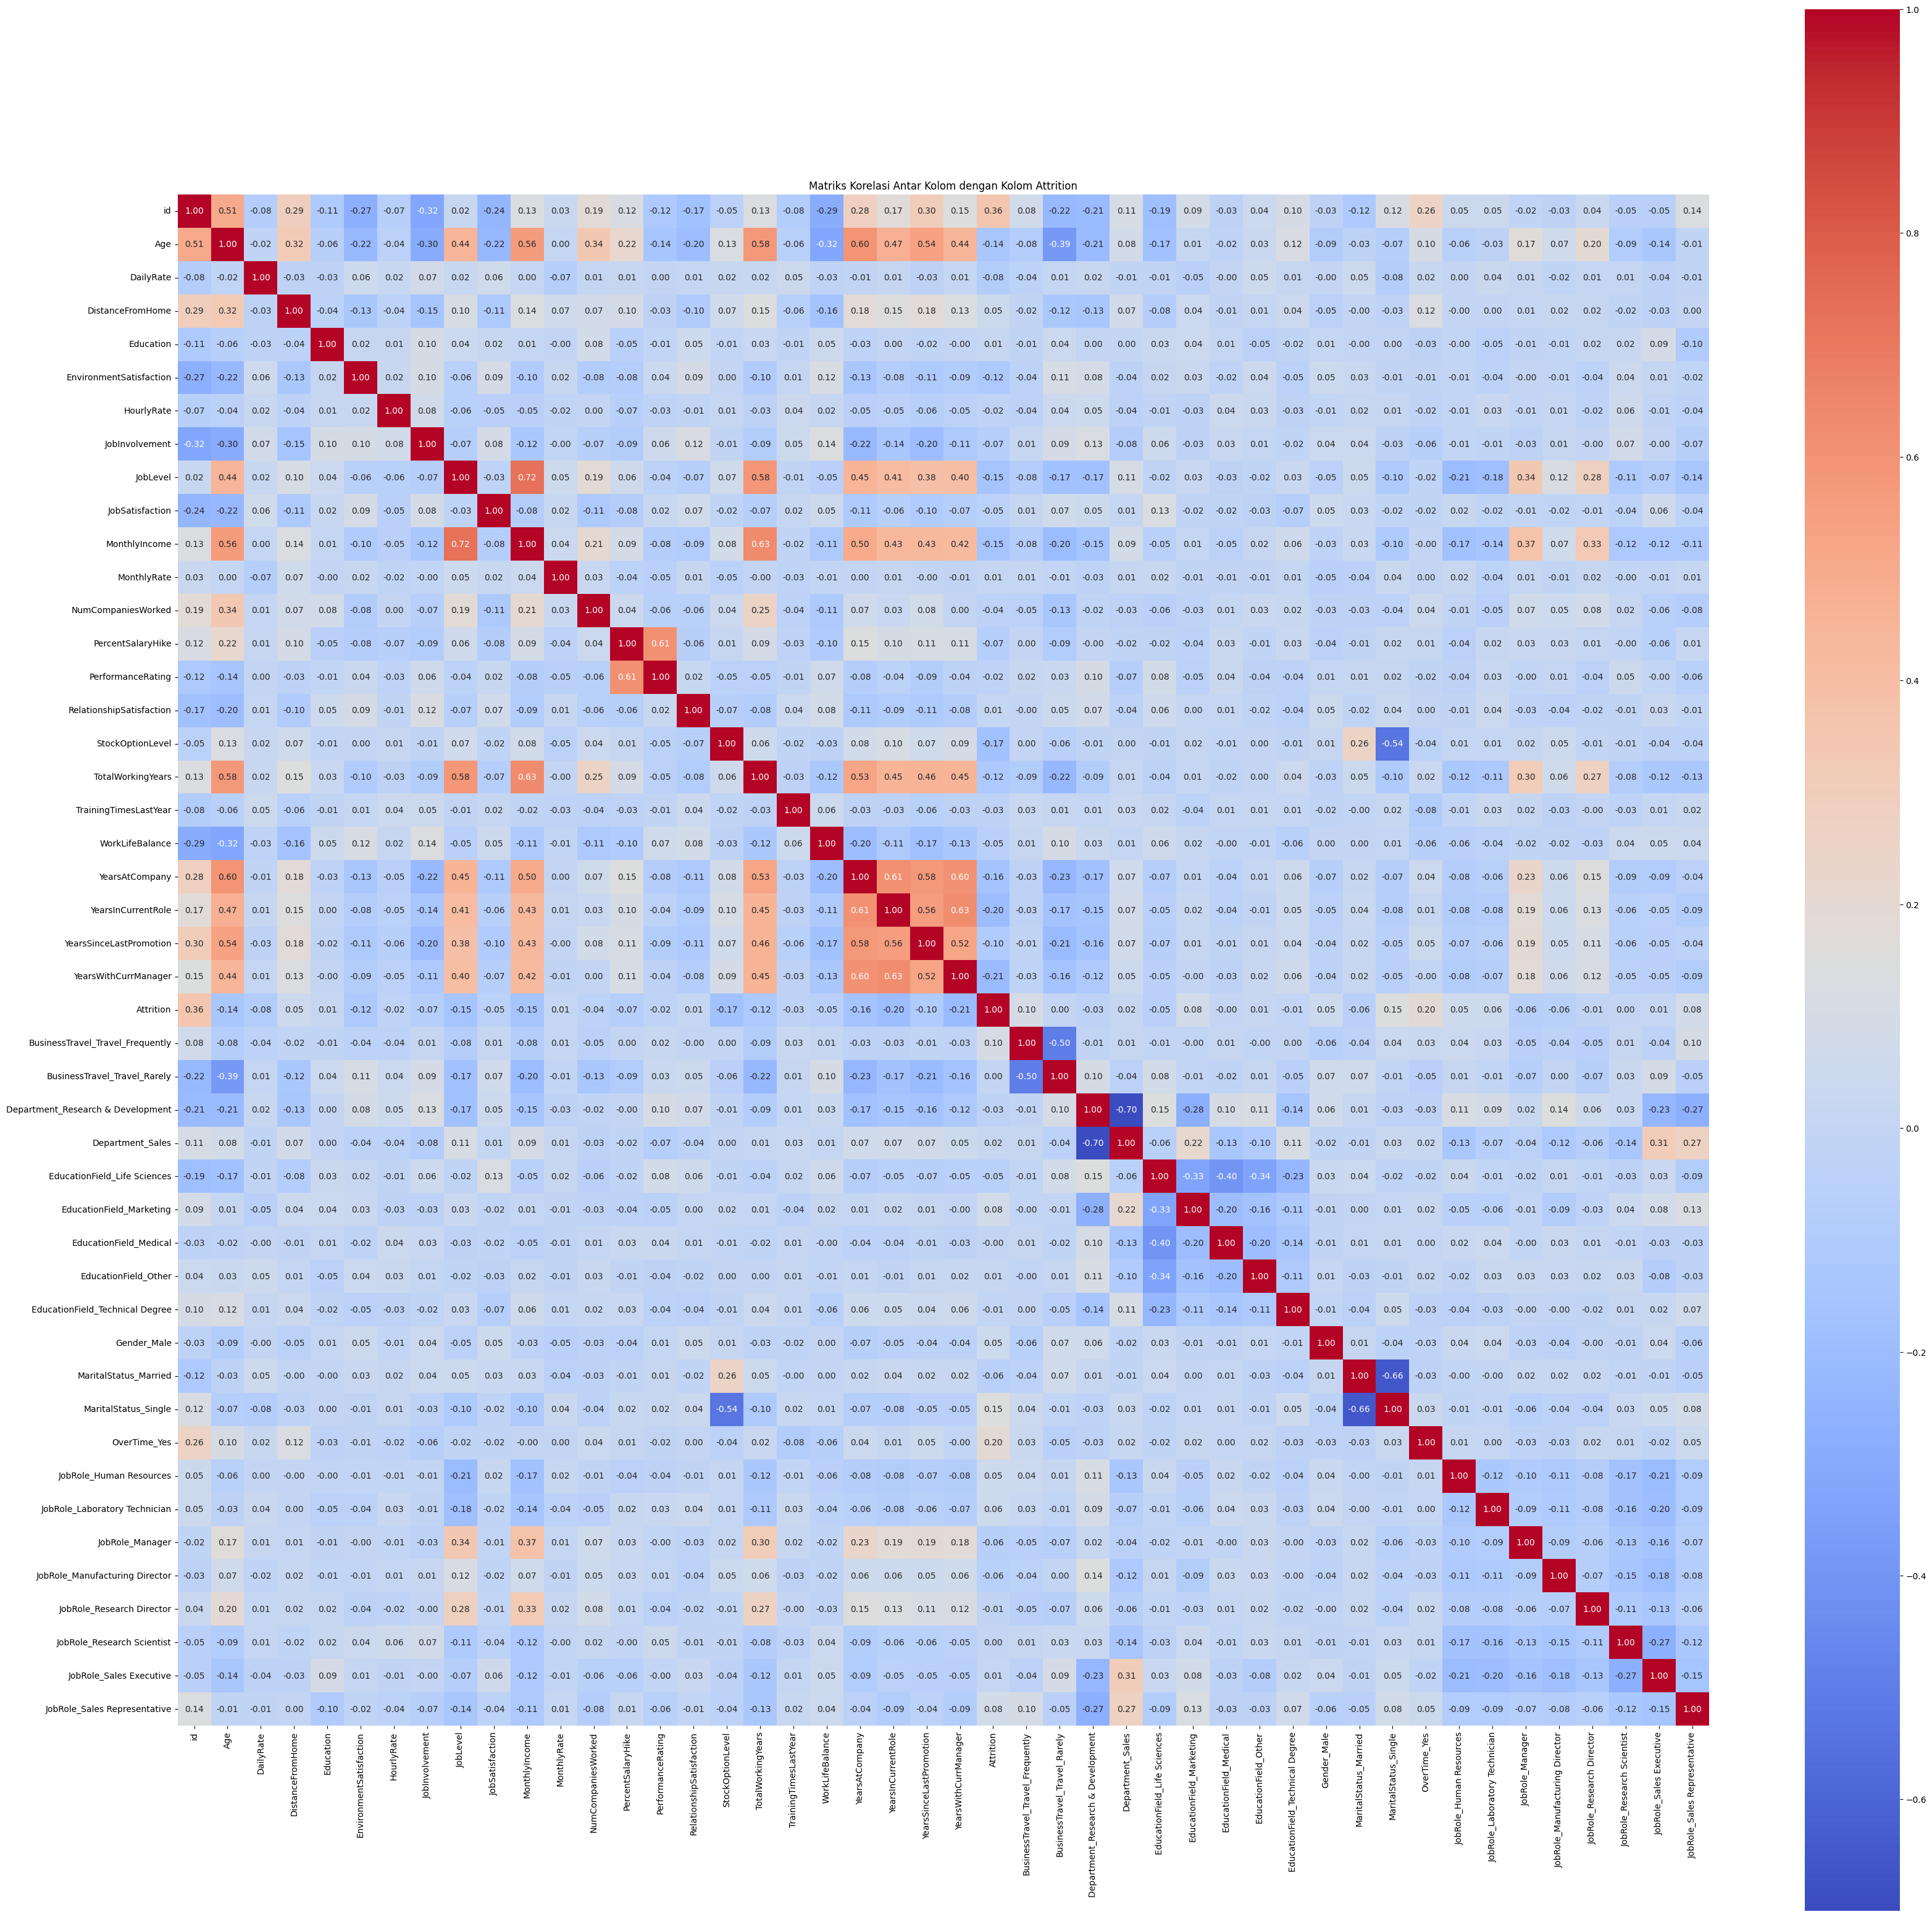

In [ ]:
# Hitung korelasi dengan kolom target
correlation_with_target = train.corr()['Attrition'].sort_values(ascending=False)

# Tampilkan hasil korelasi
print(correlation_with_target)

# Buat heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(train.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriks Korelasi Antar Kolom dengan Kolom Attrition')
plt.show()

Kita bisa lihat bahwa (tanpa memerhatikan kolom Id dan Attrition) bahwa kolom-kolom dengan tingkat korelasi yang tinggi adalah kolom-kolom yang memiliki nilai korelasi mendakati 1 atau -1. Di sini, kami memiliki strategi untuk **membuang kolom-kolom yang memiliki korelasi di antara -0.05 <= x <= 0.05** karena kolom-kolom ini menunjukkan hubungan yang sangat lemah dengan target variabel, yang berarti mereka tidak memberikan kontribusi signifikan dalam memprediksi hasil. Kolom-Kolom yang bisa kita drop adalah **DistanceFromHome**, **Department_Sales**, **Education**, **EducationField_Other**, **JobRole_Sales Executive**, **RelationshipSatisfaction**, **MonthlyRate**, **BusinessTravel_Travel_Rarely**, **JobRole_Research Scientist**, **EducationField_Medical**, **EducationField_Technical Degree**, **HourlyRate**, **PerformanceRating**, **TrainingTimesLastYear**, dan **Department_Research & Development**.

Selain membuang kolom-kolom tersebut, kami melakukan **feature engineering** dengan **membuat kolom baru yang bernama 5_high_cols yang berisi penambahan lima kolom-kolom yang memiliki hasil tertinggi (mendekati 1) dan membuat kolom baru yang bernama 3_low_cols yang berisi penambahan tiga kolom-kolom terendah (mendekati -1)** untuk kolom-kolom yang memiliki korelasi yang tinggi dengan target, seperti kolom-kolom berikut **OverTime_Yes**, **MaritalStatus_Single**, **BusinessTravel_Travel_Frequently**, **StockOptionLevel**, **YearsInCurrentRole**, **YearsWithCurrManager**, **EducationField_Marketing**, dan **JobRole_Sales Representative**.

#### Feature Engineering

In [ ]:
# Feature Engineering
train['5_high_cols'] = train['OverTime_Yes'] + train['MaritalStatus_Single'] + train['BusinessTravel_Travel_Frequently'] + train['EducationField_Marketing'] + train['JobRole_Sales Representative']
train['3_low_cols'] = train ['StockOptionLevel'] + train['YearsInCurrentRole'] + train['YearsWithCurrManager']

test['5_high_cols'] = test['OverTime_Yes'] + test['MaritalStatus_Single'] + test['BusinessTravel_Travel_Frequently'] + test['EducationField_Marketing'] + test['JobRole_Sales Representative']
test['3_low_cols'] = test['StockOptionLevel'] + test['YearsInCurrentRole'] + test['YearsWithCurrManager']

Kode di atas melakukan feature engineering dengan menambahkan **dua kolom baru pada dataset pelatihan (train) dan pengujian (test): 5_high_cols dan 3_low_cols**. Proses feature engineering ini bertujuan untuk menciptakan fitur-fitur baru dari fitur-fitur yang sudah ada, yang dapat membantu model dalam meningkatkan akurasi prediksi. Dalam konteks ini, **kolom baru yang ditambahkan didasarkan pada kombinasi dari fitur-fitur yang dipilih, dengan tujuan menciptakan representasi yang lebih baik mengenai data**. **Operasi tambah digunakan untuk menggabungkan nilai-nilai dari beberapa kolom menjadi satu**. Sebagai contoh, 5_high_cols mencakup kombinasi lima fitur yang dianggap memiliki pengaruh positif terhadap hasil yang diinginkan, seperti kemungkinan karyawan untuk tetap berada di perusahaan. Dengan menjumlahkan kolom-kolom tersebut, kita menciptakan variabel baru yang mencerminkan jumlah pengaruh dari fitur-fitur tersebut. Pemilihan untuk menggunakan lima kolom dalam 5_high_cols dan tiga kolom dalam 3_low_cols mungkin didasarkan pada pemahaman domain atau analisis awal dari data. Fitur dalam 5_high_cols dianggap memiliki dampak yang lebih signifikan dan positif, sementara 3_low_cols mencakup faktor-faktor yang dianggap memiliki dampak yang lebih rendah atau berlawanan dalam konteks memprediksi ketahanan karyawan. Hasil penjumlahan kolom-kolom dengan nilai akurasi yang tinggi di kolom baru 5_high_cols dan 3_low_cols menghasilkan kolom baru tersebut dengan nilai akurasi yang tinggi sehingga dapat membantu model untuk memprediksi hasil model yang lebih baik. Dengan membedakan jumlah kolom ini, kita dapat menguji bagaimana kombinasi fitur-fitur yang berbeda mempengaruhi model dan berpotensi meningkatkan kinerja prediksi secara keseluruhan.

#### Membuang Kolom-Kolom yang Memiliki Korelasi di Antara -0.05 <= x <= 0.05 dan Kolom-Kolom yang Sudah Digabungkan di Dalam Feature Engineering

In [ ]:
# Membuat List yang Berisi Kolom-Kolom yang Ingin di Drop Berdasarkan Hasil Analisis Korelasi
columns_to_drop = ['DistanceFromHome', 'Department_Sales', 'Education', 'EducationField_Other',
                   'JobRole_Sales Executive', 'RelationshipSatisfaction', 'MonthlyRate',
                   'BusinessTravel_Travel_Rarely', 'JobRole_Research Scientist', 'EducationField_Medical',
                   'EducationField_Technical Degree', 'HourlyRate', 'PerformanceRating',
                   'TrainingTimesLastYear', 'Department_Research & Development', 'OverTime_Yes', 'MaritalStatus_Single', 'BusinessTravel_Travel_Frequently', 'StockOptionLevel', 'YearsInCurrentRole', 'YearsWithCurrManager',
                    'EducationField_Marketing', 'JobRole_Sales Representative']

# Membuat Kolom-Kolom Tersebut dari Dataframe train dan test
train.drop(columns=columns_to_drop, inplace=True)
test.drop(columns=columns_to_drop, inplace=True)

### Mengecek Outlier

In [ ]:
# Hanya memilih kolom numerik dari dataset
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns

# Dictionary untuk menyimpan persentase outlier tiap kolom
outliers_percentage = {}

# Loop untuk setiap kolom numerik
for col in numerical_columns:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outlier
    outliers = (train[col] < lower_bound) | (train[col] > upper_bound)

    # Hitung persentase outlier
    percentage_outliers = np.mean(outliers) * 100
    outliers_percentage[col] = percentage_outliers

# Tampilkan persentase outlier untuk tiap kolom
for col, pct_outliers in outliers_percentage.items():
    print(f"Persentase outlier di kolom {col}: {pct_outliers:.2f}%")

Persentase outlier di kolom id: 0.00%
Persentase outlier di kolom Age: 15.31%
Persentase outlier di kolom DailyRate: 0.00%
Persentase outlier di kolom EnvironmentSatisfaction: 0.00%
Persentase outlier di kolom JobInvolvement: 0.00%
Persentase outlier di kolom JobLevel: 0.00%
Persentase outlier di kolom JobSatisfaction: 0.00%
Persentase outlier di kolom MonthlyIncome: 3.23%
Persentase outlier di kolom NumCompaniesWorked: 1.39%
Persentase outlier di kolom PercentSalaryHike: 1.72%
Persentase outlier di kolom TotalWorkingYears: 6.75%
Persentase outlier di kolom WorkLifeBalance: 0.00%
Persentase outlier di kolom YearsAtCompany: 10.37%
Persentase outlier di kolom YearsSinceLastPromotion: 7.06%
Persentase outlier di kolom Attrition: 0.00%
Persentase outlier di kolom EducationField_Life Sciences: 0.00%
Persentase outlier di kolom Gender_Male: 0.00%
Persentase outlier di kolom MaritalStatus_Married: 0.00%
Persentase outlier di kolom JobRole_Human Resources: 11.16%
Persentase outlier di kolom Jo

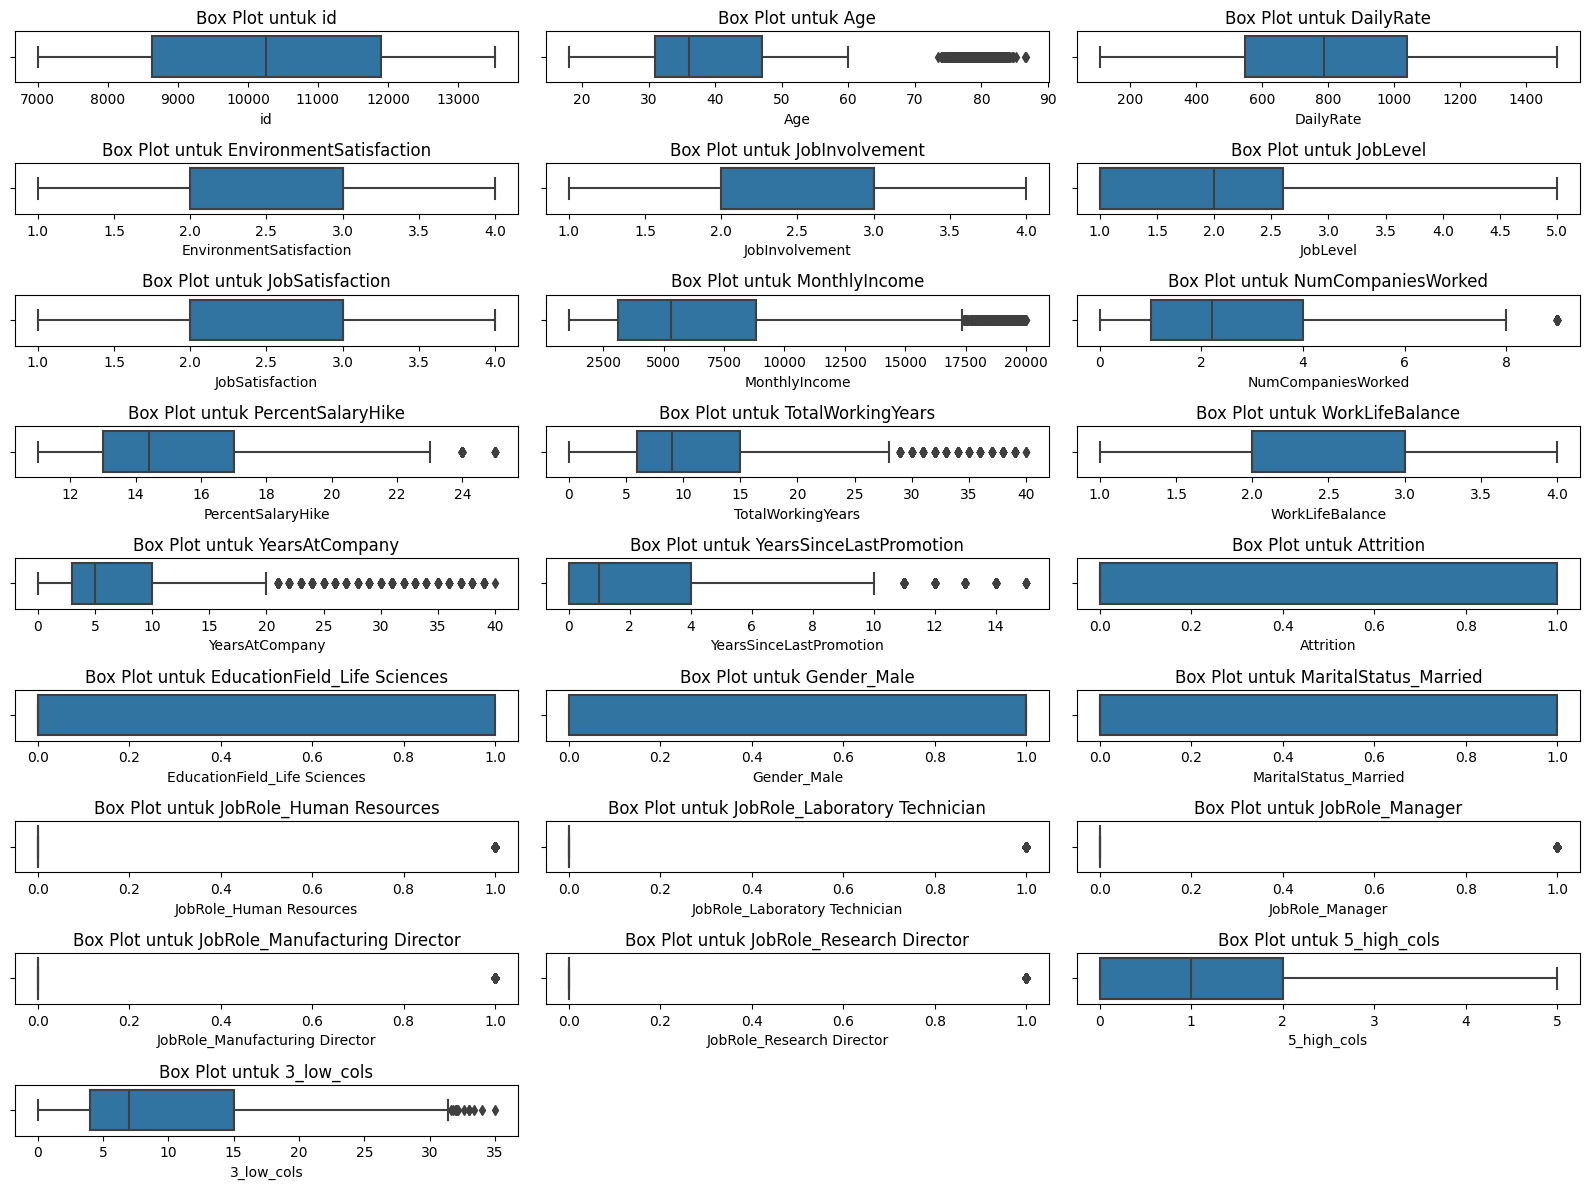

In [ ]:
# Hanya memilih kolom numerik dari dataset
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns

# Mengatur ukuran grafik
plt.figure(figsize=(16, 12))

# Mengatur jumlah kolom dalam subplot
ncols = 3
nrows = (len(numerical_columns) + ncols - 1) // ncols  # Hitung jumlah baris yang diperlukan

# Loop untuk setiap kolom numerik
for i, col in enumerate(numerical_columns):
    plt.subplot(nrows, ncols, i + 1)  # Mengatur subplot sesuai jumlah baris dan kolom
    sns.boxplot(x=train[col])
    plt.title(f'Box Plot untuk {col}')
    plt.xlabel(col)

plt.tight_layout()  # Mengatur layout agar lebih rapi
plt.show()

**Outlier** adalah nilai yang sangat berbeda dari nilai lainnya dalam dataset dan dapat memengaruhi kinerja model. Dalam analisis ini, kami mencatat persentase **outlier** di beberapa kolom. Meskipun persentase **outlier** di kolom **Age** mencapai 15.31% dan di kolom **TotalWorkingYears** mencapai 6.75%, **kami memilih untuk tidak menghapus outlier** tersebut karena penghapusan justru menurunkan performa model. Kolom lain seperti **MonthlyIncome** dan **YearsAtCompany** juga menunjukkan persentase outlier masing-masing sebesar 3.23% dan 10.37%. Namun, secara keseluruhan, **persentase outlier di kolom-kolom tersebut belum mencapai 20%**, yang menunjukkan bahwa pengaruhnya terhadap model masih dalam batas yang wajar. Oleh karena itu, **keputusan untuk mempertahankan outlier dalam dataset ini dianggap lebih baik untuk meningkatkan akurasi model**. Untuk tabel outlier yang kosong (tidak ada permukaaan yang berwarna biru) terjadi karena kolom tersebut hanya berisi 1 dan 0.

## **Modelling and Evaluation**

### Modelling Preparation

In [ ]:
# Memisahkan Kolom Attrition dan Membuatnya Sebagai Kolom Sendiri
X = train.drop(columns=['Attrition'], axis=1)
y = train['Attrition']

# Memisahkan Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**test_size = 0.2:** Menentukan proporsi data yang akan digunakan sebagai data uji, dalam hal ini 20% dari total data.

**random_state = 42:** Memastikan bahwa pemisahan data dilakukan secara konsisten setiap kali kode dijalankan dengan menggunakan seed tertentu (42).

#### Mengecek Imbalanced Data

Attrition
0.0    0.599541
1.0    0.400459
Name: proportion, dtype: float64
Attrition
0.0    59.954058
1.0    40.045942
Name: proportion, dtype: float64


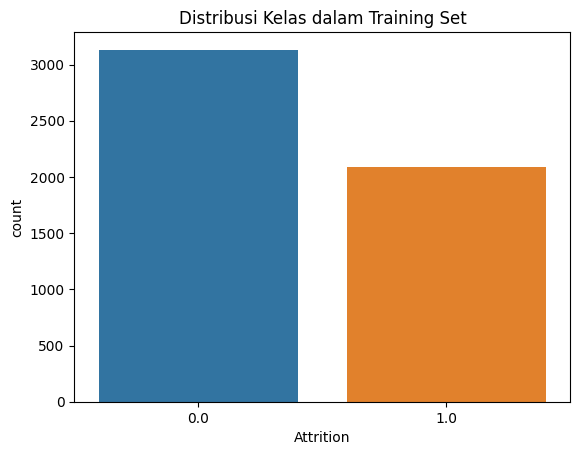

In [ ]:
# Cek Distribusi Kelas dari Variabel Target
print(y_train.value_counts(normalize=True))

# Hasil dalam Persentase
class_distribution = y_train.value_counts(normalize=True) * 100
print(class_distribution)

# Visualisasi Distribusi Kelas
sns.countplot(x=y_train)
plt.title('Distribusi Kelas dalam Training Set')
plt.show()

Distribusi kelas dalam training set menunjukkan ketidakseimbangan, namun persentase tersebut hanya 60% untuk kelas mayoritas dan 40% untuk kelas minoritas, yang dianggap masih dalam batas yang relatif wajar. Oleh karena itu, **kita tidak perlu melakukan penanganan khusus untuk data yang tidak seimbang**. Kinerja model dapat tetap dievaluasi dengan baik meskipun ada perbedaan persentase ini, dan jika model menunjukkan hasil yang memuaskan, kita dapat melanjutkan tanpa melakukan perubahan pada data.

### Membandingkan Hasil dari Model-Model

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2092, number of negative: 3132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1457
[LightGBM] [Info] Number of data points in the train set: 5224, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.400459 -> initscore=-0.403551
[LightGBM] [Info] Start training from score -0.403551


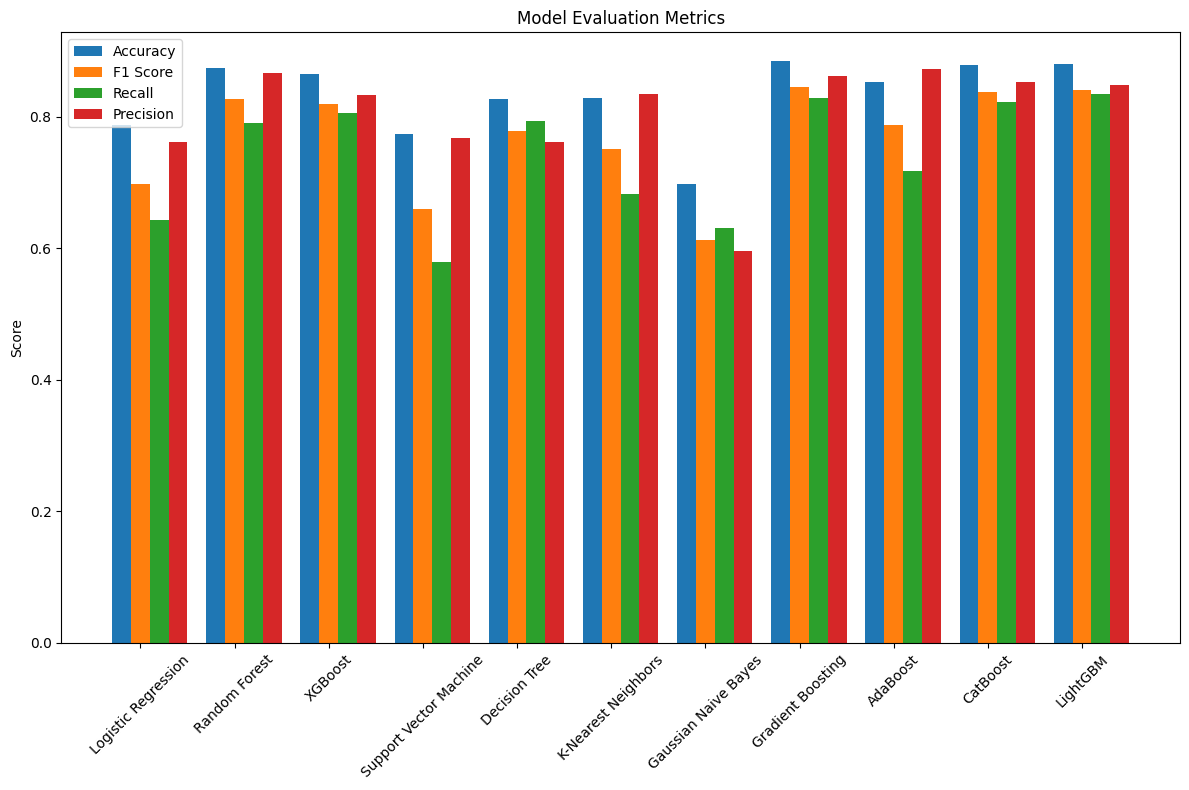

                     Model  Accuracy  F1 Score    Recall  Precision
0      Logistic Regression  0.787902  0.697268  0.643145   0.761337
1            Random Forest  0.874426  0.827004  0.790323   0.867257
2                  XGBoost  0.865237  0.819672  0.806452   0.833333
3   Support Vector Machine  0.773354  0.659770  0.578629   0.767380
4            Decision Tree  0.827718  0.777887  0.794355   0.762089
5      K-Nearest Neighbors  0.828484  0.751663  0.683468   0.834975
6     Gaussian Naive Bayes  0.697550  0.613124  0.631048   0.596190
7        Gradient Boosting  0.884380  0.844810  0.828629   0.861635
8                 AdaBoost  0.852986  0.787611  0.717742   0.872549
9                 CatBoost  0.879020  0.837782  0.822581   0.853556
10                LightGBM  0.880551  0.841463  0.834677   0.848361


In [ ]:
# Daftar model yang akan dievaluasi
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'CatBoost': cb.CatBoostClassifier(verbose=0, random_state=42),  # Menambahkan CatBoost
    'LightGBM': lgb.LGBMClassifier(random_state=42)  # Menambahkan LightGBM
}

# Simpan hasil metrik
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Recall': recall,
        'Precision': precision
    })

# Buat DataFrame untuk hasil
results_df = pd.DataFrame(results)

# Buat grafik untuk menampilkan hasil metrik
plt.figure(figsize=(12, 8))

# Mengatur posisi bar
bar_width = 0.2
positions = range(len(results_df))

# Membuat bar untuk setiap metrik
plt.bar([p - bar_width for p in positions], results_df['Accuracy'], width=bar_width, label='Accuracy')
plt.bar(positions, results_df['F1 Score'], width=bar_width, label='F1 Score')
plt.bar([p + bar_width for p in positions], results_df['Recall'], width=bar_width, label='Recall')
plt.bar([p + 2 * bar_width for p in positions], results_df['Precision'], width=bar_width, label='Precision')

# Menambahkan label dan judul
plt.xticks(positions, results_df['Model'], rotation=45)
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()

# Tampilkan hasil DataFrame
print(results_df)

Berdasarkan hasil evaluasi berbagai model, **Gradient Boosting** menunjukkan performa terbaik dengan akurasi 88.44% dan F1 Score 0.8448. Diikuti oleh **CatBoost** dengan akurasi 87.90% dan F1 Score 0.8378, serta **LightGBM** dengan akurasi 88.06% dan F1 Score 0.8415. Model-model lain, seperti **Random Forest dan XGBoost**, juga menunjukkan hasil yang baik, tetapi tidak sebaik tiga model teratas tersebut.

Dengan mempertimbangkan hasil ini, **kami akan melakukan hyperparameter tuning pada Gradient Boosting, CatBoost, dan LightGBM untuk meningkatkan F1 Score dan mendapatkan performa model yang lebih optimal**. F1 Score merupakan metrik yang penting karena menggabungkan aspek recall dan precision. Tuning ini diharapkan dapat membantu dalam menemukan kombinasi parameter yang paling efektif untuk meningkatkan kinerja model dalam memprediksi hasil.

### Hyperparameter Tuning terhadap 3 Model Tertinggi


Kami menggunakan **GridSearchCV** untuk hyperparameter tuning karena metode ini memastikan bahwa setiap kombinasi parameter yang mungkin diuji secara menyeluruh. **GridSearchCV** melakukan pencarian pada semua kombinasi yang ada dalam ruang parameter yang telah ditentukan, yang berarti kami mendapatkan pemahaman yang jelas tentang pengaruh setiap kombinasi parameter terhadap kinerja model. Ini sangat berguna ketika kami ingin mendapatkan hasil optimal yang konsisten dari tuning, terutama jika dataset yang digunakan tidak terlalu besar dan waktu pemrosesan masih dapat ditoleransi.

Metode lain seperti RandomizedSearchCV dan Optuna bekerja dengan cara yang berbeda. RandomizedSearchCV memilih kombinasi parameter secara acak dari ruang parameter yang telah ditentukan, yang bisa lebih cepat tetapi tidak selalu menjamin hasil terbaik karena mungkin melewatkan kombinasi parameter yang optimal. Pada dataset atau model tertentu, pencarian acak ini dapat menyebabkan penurunan performa, karena tidak semua kombinasi yang baik diuji.

Sedangkan Optuna menggunakan optimasi berbasis Bayesian, yang mencari parameter dengan cerdas berdasarkan iterasi sebelumnya. Namun, metode ini lebih cocok untuk dataset atau model yang sangat kompleks dengan ruang parameter besar. Jika tidak diatur dengan benar, Optuna bisa terlalu cepat mengeksplorasi ruang parameter yang salah dan malah membuat performa model menurun dibandingkan dengan **GridSearchCV** yang mencakup seluruh kombinasi dengan lebih pasti.

Jadi, dengan **GridSearchCV**, meskipun mungkin lebih lambat, kami memastikan setiap kombinasi parameter diuji dengan teliti, sehingga mengurangi risiko penurunan performa yang disebabkan oleh pemilihan parameter yang kurang optimal.

#### Hyperparameter Tuning terhadap GradientBoosting

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=

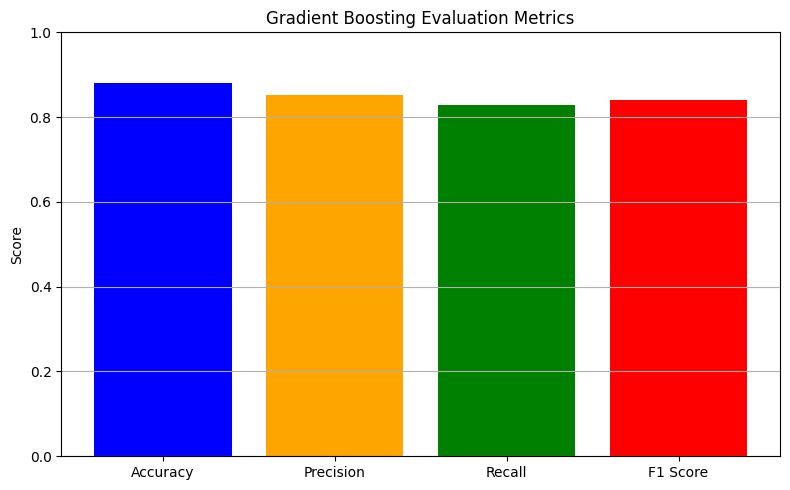

In [ ]:
# Inisialisasi model Gradient Boosting
model = GradientBoostingClassifier()

# Definisikan parameter grid untuk tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='f1', cv=5, verbose=2, n_jobs=-1)

# Fit model dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Gunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_

# Prediksi pada data validasi untuk menghitung metrik evaluasi
y_pred = best_model.predict(X_test)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Sesuaikan average jika multi-class
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Tampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Buat grafik untuk menampilkan metrik evaluasi
metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 5))
plt.bar(metric_names, metrics, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Gradient Boosting Evaluation Metrics')
plt.ylabel('Score')
plt.grid(axis='y')

# Tampilkan grafik
plt.tight_layout()
plt.show()

#### Hyperparameter Tuning terhadap LightGBM

In [ ]:
# Import libraries yang diperlukan
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Inisialisasi model LightGBM
model_lgbm = lgb.LGBMClassifier()

# Definisikan parameter grid untuk tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_samples': [20, 30, 50],
    'num_leaves': [31, 50, 70],
    'subsample': [0.8, 0.9, 1.0]
}

# Inisialisasi GridSearchCV
grid_search_lgbm = GridSearchCV(estimator=model_lgbm, param_grid=param_grid,
                                scoring='f1', cv=5, verbose=2, n_jobs=-1)

# Fit model dengan GridSearchCV
grid_search_lgbm.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best Parameters (LightGBM):", grid_search_lgbm.best_params_)
print("Best F1 Score (LightGBM):", grid_search_lgbm.best_score_)

# Gunakan model terbaik untuk prediksi
best_model_lgbm = grid_search_lgbm.best_estimator_

# Prediksi pada data validasi untuk menghitung metrik evaluasi
y_pred_lgbm = best_model_lgbm.predict(X_test)

# Hitung metrik evaluasi
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm, average='binary')  # Sesuaikan average jika multi-class
recall_lgbm = recall_score(y_test, y_pred_lgbm, average='binary')
f1_lgbm = f1_score(y_test, y_pred_lgbm, average='binary')

# Tampilkan hasil evaluasi
print(f"Accuracy (LightGBM): {accuracy_lgbm:.4f}")
print(f"Precision (LightGBM): {precision_lgbm:.4f}")
print(f"Recall (LightGBM): {recall_lgbm:.4f}")
print(f"F1 Score (LightGBM): {f1_lgbm:.4f}")

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2092, number of negative: 3132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1455
[LightGBM] [Info] Number of data points in the train set: 5224, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.400459 -> initscore=-0.403551
[LightGBM] [Info] Start training from score -0.403551
Best Parameters (LightGBM): {'learning_rate': 0.01, 'max_depth': 7, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.8}
Best F1 Score (LightGBM): 0.8500127221536168
Accuracy (LightGBM): 0.8890
Precision (LightGBM): 0.8531
Recall (LightGBM): 0.8548
F1 Score (LightGBM): 0.

#### Hyperparameter Tuning terhadap CatBoost

In [ ]:
# Import libraries yang diperlukan
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Inisialisasi model CatBoost tanpa class_weight='balanced'
model_catboost = CatBoostClassifier(silent=True)

# Definisikan parameter grid untuk tuning
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 50, 100],
    'subsample': [0.8, 0.9, 1.0]
}

# Inisialisasi GridSearchCV
grid_search_catboost = GridSearchCV(estimator=model_catboost, param_grid=param_grid,
                                    scoring='f1', cv=5, verbose=2, n_jobs=-1)

# Fit model dengan GridSearchCV
grid_search_catboost.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best Parameters (CatBoost):", grid_search_catboost.best_params_)
print("Best F1 Score (CatBoost):", grid_search_catboost.best_score_)

# Gunakan model terbaik untuk prediksi
best_model_catboost = grid_search_catboost.best_estimator_

# Prediksi pada data validasi untuk menghitung metrik evaluasi
y_pred_catboost = best_model_catboost.predict(X_test)

# Hitung metrik evaluasi
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost, average='binary')  # Sesuaikan average jika multi-class
recall_catboost = recall_score(y_test, y_pred_catboost, average='binary')
f1_catboost = f1_score(y_test, y_pred_catboost, average='binary')

# Tampilkan hasil evaluasi
print(f"Accuracy (CatBoost): {accuracy_catboost:.4f}")
print(f"Precision (CatBoost): {precision_catboost:.4f}")
print(f"Recall (CatBoost): {recall_catboost:.4f}")
print(f"F1 Score (CatBoost): {f1_catboost:.4f}")

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters (CatBoost): {'border_count': 100, 'depth': 3, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.1, 'subsample': 0.8}
Best F1 Score (CatBoost): 0.8342322668505968
Accuracy (CatBoost): 0.8790
Precision (CatBoost): 0.8506
Recall (CatBoost): 0.8266
F1 Score (CatBoost): 0.8384


### Membuat Submission dengan Model yang Memiliki Best F1 Score Tertinggi

In [ ]:
# Import libraries yang diperlukan
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Misalkan sudah ada hasil dari GridSearchCV
best_params_lgbm = {
    'learning_rate': 0.01,
    'max_depth': 7,
    'min_child_samples': 20,
    'n_estimators': 200,
    'num_leaves': 31,
    'subsample': 0.8
}

# Inisialisasi model LightGBM dengan parameter terbaik
best_model_lgbm = lgb.LGBMClassifier(**best_params_lgbm)

# Fit model terbaik dengan data training
best_model_lgbm.fit(X_train, y_train)

# Prediksi pada data validasi untuk menghitung metrik evaluasi
y_pred_lgbm = best_model_lgbm.predict(X_test)

# Hitung metrik evaluasi
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm, average='binary')  # Sesuaikan average jika multi-class
recall_lgbm = recall_score(y_test, y_pred_lgbm, average='binary')
f1_lgbm = f1_score(y_test, y_pred_lgbm, average='binary')

# Tampilkan hasil evaluasi
print(f"Accuracy (LightGBM): {accuracy_lgbm:.4f}")
print(f"Precision (LightGBM): {precision_lgbm:.4f}")
print(f"Recall (LightGBM): {recall_lgbm:.4f}")
print(f"F1 Score (LightGBM): {f1_lgbm:.4f}")

# Prediksi pada test set
X_test_final = test.drop(columns=['Attrition'])  # Sesuaikan jika test set memiliki struktur berbeda
test_predictions_lgbm = best_model_lgbm.predict(X_test_final)

# Buat DataFrame untuk submission.csv
submission_lgbm = pd.DataFrame({
    'id': test['id'],  # Pastikan ada kolom 'id' di test set
    'Attrition': test_predictions_lgbm
})

# Simpan sebagai submission.csv
submission_lgbm.to_csv('submission_lightgbm_best_bismillah_bgt_5.csv', index=False)

print("Submission file created: submission_lightgbm_best_bismillah_bgt_5.csv")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2092, number of negative: 3132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1455
[LightGBM] [Info] Number of data points in the train set: 5224, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.400459 -> initscore=-0.403551
[LightGBM] [Info] Start training from score -0.403551
Accuracy (LightGBM): 0.8890
Precision (LightGBM): 0.8531
Recall (LightGBM): 0.8548
F1 Score (LightGBM): 0.8540
Submission file created: submission_lightgbm_best_bismillah_bgt_4.csv


### Conclusion

#### Conclusion for Choosing The Best Model

Model terbaik yang dimiliki adalah **LightGBM** dengan F1 Best Scorenya adalah **0.8500127221536168** dengan parameter tuning 'learning_rate': 0.01, 'max_depth': 7, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.8. Meskipun pada awalnya model **Gradient Boosting** menunjukkan performa terbaik dengan F1 Score tertinggi, setelah dilakukan hyperparameter tuning, justru **LightGBM** yang menghasilkan F1 Score terbaik, yaitu **0.8500**. Hal ini menekankan bahwa **tuning parameter** memiliki peran penting dalam memaksimalkan performa model. LightGBM mengungguli Gradient Boosting karena beberapa faktor. Pertama, LightGBM menggunakan **leaf-wise tree growth**, yang lebih efisien dalam menangani data besar dan kompleks dibandingkan dengan metode level-wise yang digunakan oleh Gradient Boosting. Ini memungkinkan LightGBM membangun pohon yang lebih dalam dengan lebih sedikit iterasi. Kedua, setelah tuning, **kombinasi parameter optimal** ditemukan pada LightGBM, seperti `learning_rate` yang lebih rendah (0.01) yang membantu model belajar secara bertahap, `max_depth` yang lebih dalam (7) untuk menangani data yang lebih kompleks, dan jumlah estimasi (`n_estimators`) yang lebih besar (200) untuk memastikan lebih banyak iterasi pembelajaran. Terakhir, parameter seperti **`min_child_samples` dan `subsample`** membantu LightGBM mengatur penggunaan data selama proses pelatihan, sehingga model tetap bekerja baik meskipun terdapat ketidakseimbangan kecil dalam kelas target. Semua faktor ini memungkinkan LightGBM mencapai hasil yang lebih baik setelah tuning, meskipun Gradient Boosting pada awalnya terlihat lebih unggul.

#### Conclusion for The Company

Melalui hasil analisis korelasi, terdapat beberapa faktor yang berkontribusi secara signifikan terhadap attrisi karyawan. Karyawan yang sering lembur (**OverTime_Yes**), berstatus lajang (**MaritalStatus_Single**), dan sering melakukan perjalanan bisnis (**BusinessTravel_Travel_Frequently**) cenderung memiliki risiko lebih tinggi untuk meninggalkan perusahaan. Hal tersebut menunjukkan bahwa beban kerja yang berat serta keseimbangan antara kehidupan dan kerja terganggu dapat menjadi penyebab utama meningkatnya attrisi. Dari hasil tersebut juga dapat terlihat bahwa karyawan yang telah bekerja lebih lama dengan manajer mereka (**YearsWithCurrManager**), memiliki massa kerja yang lebih panjang dalam perusahaan **(YearsInCurrentRole**), atau mendapatkan gaji yang lebih tinggi (**MonthlyIncome**) cenderung memiliki tingkat retensi lebih baik. Berdasarkan hasil ini, perusahaan dapat berfokus dalam upaya meningkatkan karyawan dengan memberikan keseimbangan kerja-kehidupan yang lebih baik, membatasi lembur, serta memperkuat hubungan antara manajer dan karyawan untuk meningkatkan retensi.